In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

### 데이터 로드

In [22]:
data = pd.read_csv("/home/ubuntu/drive/SAM/merged_final.csv", encoding="UTF-8")

In [23]:
cdata = data.copy()
cdata.head()

,Unnamed: 0,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,측정월,input_image_name,input_image_path,img_id,area_code,shot_datetime,count_masks,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
0,58758,2021-09-10 13:00:00,2021-09-10,1구역,F0016,27.52,72.22,467.9,22.51,223.17,2021.0,9.0,F0016-C101-20210910-125907,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,d45f2f28bf7fb63dda831452e8442386,C101,2021-09-10 12:59:07,2.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-075908,283f919417b3c53b4089683ba1cf7ca2,F0016-C101-20210910-125907_0,065e7a9bdd5065fe01976ff3f4f49f03,1132.451172,554.744629,535,"[[121, 123, 112], [123, 125, 114], [118, 120, ...",image_mask_0.png
1,58758,2021-09-10 13:00:00,2021-09-10,1구역,F0016,27.52,72.22,467.9,22.51,223.17,2021.0,9.0,F0016-C101-20210910-125907,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,d45f2f28bf7fb63dda831452e8442386,C101,2021-09-10 12:59:07,2.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-075908,283f919417b3c53b4089683ba1cf7ca2,F0016-C101-20210910-125907_1,c8f4ef001e5f686be96b1cb1bb68f68d,880.826233,100.000298,37040,"[[54, 63, 44], [88, 97, 76], [82, 91, 70], [85...",image_mask_1.png
2,58782,2021-09-10 17:00:00,2021-09-10,1구역,F0016,27.02,71.23,463.1,23.77,102.75,2021.0,9.0,F0016-C101-20210910-165907,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,b4bfa5aa441ebc72f213cb99fa30068b,C101,2021-09-10 16:59:07,7.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-125907,d45f2f28bf7fb63dda831452e8442386,F0016-C101-20210910-165907_0,065e7a9bdd5065fe01976ff3f4f49f03,1136.085205,556.137573,576,"[[70, 71, 65], [68, 69, 63], [63, 64, 58], [49...",image_mask_0.png
3,58782,2021-09-10 17:00:00,2021-09-10,1구역,F0016,27.02,71.23,463.1,23.77,102.75,2021.0,9.0,F0016-C101-20210910-165907,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,b4bfa5aa441ebc72f213cb99fa30068b,C101,2021-09-10 16:59:07,7.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-125907,d45f2f28bf7fb63dda831452e8442386,F0016-C101-20210910-165907_1,3cf79ada342fb0b16364c9ea6d703f9f,771.131104,102.249115,20098,"[[22, 24, 10], [27, 30, 11], [42, 45, 24], [35...",image_mask_1.png
4,58782,2021-09-10 17:00:00,2021-09-10,1구역,F0016,27.02,71.23,463.1,23.77,102.75,2021.0,9.0,F0016-C101-20210910-165907,/home/ubuntu/drive/dataset/plant/F0016/C101/F0...,b4bfa5aa441ebc72f213cb99fa30068b,C101,2021-09-10 16:59:07,7.0,/opt/dlami/nvme/SAM_result/F0016/C101/F0016-C1...,F0016-C101-20210910-125907,d45f2f28bf7fb63dda831452e8442386,F0016-C101-20210910-165907_2,fd48e0393a4d25876b5fb82e9571361e,902.543579,109.905945,22199,"[[97, 93, 92], [80, 79, 77], [85, 84, 80], [83...",image_mask_2.png


In [24]:
cdata.drop(["Unnamed: 0"], axis=1, inplace=True)

In [25]:
cdata.columns

Index(['check_datetime', '측정일자', '구역명', 'farm_code', '내부온도', '내부습도', '내부CO2',
       '근권온도', '내부순간일사량', '측정년도', '측정월', 'input_image_name',
       'input_image_path', 'img_id', 'area_code', 'shot_datetime',
       'count_masks', 'bbox_image_path', 'before_img_name', 'before_img_id',
       'mask_num', 'mask_id', 'point_x', 'point_y', 'size', 'color',
       'output_image_path'],
      dtype='object')

### 전처리

In [26]:
import re  
# 정규표현식 패턴
pattern = re.compile(r'\d+$')
### mask_num 전처리
for idx, mask in enumerate(cdata["mask_num"]):
  # 숫자 추출
  match = re.search(pattern, mask)
  if match:
    number = int(match.group()) + 1
    cdata.iloc[idx, 20] = re.sub(pattern, str(number), mask)

print(cdata["mask_num"])

0          F0016-C101-20210910-125907_1
1          F0016-C101-20210910-125907_2
2          F0016-C101-20210910-165907_1
3          F0016-C101-20210910-165907_2
4          F0016-C101-20210910-165907_3
                      ...              
134325    F0017-C101-20240403-084305_33
134326    F0017-C101-20240403-084305_34
134327    F0017-C101-20240403-084305_35
134328    F0017-C101-20240403-084305_36
134329    F0017-C101-20240403-084305_37
Name: mask_num, Length: 134330, dtype: object


In [27]:
### output_image_path 전처리
### 정규표현식 패턴
pattern = re.compile(r'(\d+)(?=\.\w+$)')
for idx, path in enumerate(cdata["output_image_path"]):
  # 숫자 추출
  match = re.search(pattern, path)
  if match:
    number = int(match.group()) + 1
    cdata.iloc[idx, -1] = re.sub(pattern, str(number), path)

print(cdata["output_image_path"])

0          image_mask_1.png
1          image_mask_2.png
2          image_mask_1.png
3          image_mask_2.png
4          image_mask_3.png
                ...        
134325    image_mask_33.png
134326    image_mask_34.png
134327    image_mask_35.png
134328    image_mask_36.png
134329    image_mask_37.png
Name: output_image_path, Length: 134330, dtype: object


### EDA

In [42]:
f0017 = cdata[cdata['farm_code'] == 'F0017'].reset_index()
f0017.drop(["index"], axis=1, inplace=True)

In [43]:
f0017.head(3)

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,측정월,input_image_name,input_image_path,img_id,area_code,shot_datetime,count_masks,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
0,2021-09-06 16:50:00,2021-09-06,1구역,F0017,21.87,89.44,453.6,21.63,0.0,2021.0,9.0,F0017-C101-20210906-165203,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,f485ffc32e92855a224cf70b24f92429,C101,2021-09-06 16:52:03,3.0,/opt/dlami/nvme/SAM_result/F0017/C101/F0017-C1...,F0017-C101-20210906-125908,0ae6e9c3c9dca2a66df4ac732890ad54,F0017-C101-20210906-165203_1,da575cd4a0e4c9670fb45fa1f7a36431,88.402451,428.899048,4520,"[[3, 0, 28], [0, 0, 25], [40, 35, 65], [2, 3, ...",image_mask_1.png
1,2021-09-06 16:50:00,2021-09-06,1구역,F0017,21.87,89.44,453.6,21.63,0.0,2021.0,9.0,F0017-C101-20210906-165203,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,f485ffc32e92855a224cf70b24f92429,C101,2021-09-06 16:52:03,3.0,/opt/dlami/nvme/SAM_result/F0017/C101/F0017-C1...,F0017-C101-20210906-125908,0ae6e9c3c9dca2a66df4ac732890ad54,F0017-C101-20210906-165203_2,8bd8516161a651f71faa6fe79e7ad838,1757.356812,12.163767,1032,"[[101, 97, 96], [119, 113, 113], [121, 115, 11...",image_mask_2.png
2,2021-09-06 16:50:00,2021-09-06,1구역,F0017,21.87,89.44,453.6,21.63,0.0,2021.0,9.0,F0017-C101-20210906-165203,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,f485ffc32e92855a224cf70b24f92429,C101,2021-09-06 16:52:03,3.0,/opt/dlami/nvme/SAM_result/F0017/C101/F0017-C1...,F0017-C101-20210906-125908,0ae6e9c3c9dca2a66df4ac732890ad54,F0017-C101-20210906-165203_3,891f58ff697094813c91bd994c3701a4,1312.929688,51.480877,3857,"[[248, 252, 255], [248, 252, 253], [252, 255, ...",image_mask_3.png


In [44]:
f0017.loc[:5, ["check_datetime", "input_image_name", "before_img_name"]]

,check_datetime,input_image_name,before_img_name
0,2021-09-06 16:50:00,F0017-C101-20210906-165203,F0017-C101-20210906-125908
1,2021-09-06 16:50:00,F0017-C101-20210906-165203,F0017-C101-20210906-125908
2,2021-09-06 16:50:00,F0017-C101-20210906-165203,F0017-C101-20210906-125908
3,2021-09-07 13:00:00,F0017-C101-20210907-125903,F0017-C101-20210907-075905
4,2021-09-08 13:00:00,F0017-C101-20210908-125904,F0017-C101-20210908-075904
5,2021-09-09 08:00:00,F0017-C101-20210909-075904,F0017-C101-20210908-165204


### 2021년 9월

In [57]:
### 2021년 9월에 해당하는 이미지 필터링
sep_2021 = f0017[(f0017["측정년도"] == 2021) & (f0017["측정월"] == 9)]

# 측정 일자를 datetime으로 변환
sep_2021["측정일자"] = pd.to_datetime(sep_2021["측정일자"])

# 날짜 필터링
# nov = nov[(nov["측정일자"].dt.weekday == 0) | (nov["측정일자"].dt.weekday == 1)]

/tmp/ipykernel_263817/2703614697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_2021["측정일자"] = pd.to_datetime(sep_2021["측정일자"])


In [58]:
sep_2021['before_img_name'].unique()

array(['F0017-C101-20210906-125908', 'F0017-C101-20210907-075905',
       'F0017-C101-20210908-075904', 'F0017-C101-20210908-165204',
       'F0017-C101-20210909-125906', 'F0017-C101-20210910-075907',
       'F0017-C101-20210910-125907', 'F0017-C101-20210911-075905',
       'F0017-C101-20210911-125904', 'F0017-C101-20210912-125908',
       'F0017-C101-20210913-075904', 'F0017-C101-20210913-165204',
       'F0017-C101-20210914-075904', 'F0017-C101-20210914-125905',
       'F0017-C101-20210914-165203', 'F0017-C101-20210915-075907',
       'F0017-C101-20210915-125906', 'F0017-C101-20210915-165204',
       'F0017-C101-20210916-075907', 'F0017-C101-20210916-125904',
       'F0017-C101-20210917-125905', 'F0017-C101-20210917-165204',
       'F0017-C101-20210918-075904', 'F0017-C101-20210918-125906',
       'F0017-C101-20210918-165203', 'F0017-C101-20210919-075909',
       'F0017-C101-20210919-125904', 'F0017-C101-20210919-165203',
       'F0017-C101-20210920-165206', 'F0017-C101-20210921-0759

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20210909-165204
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20210909-125906
mask_num_x                                  F0017-C101-20210909-165204_1
mask_id                                 644001cbe1856ab02e5637c99b3fc8ef
point_x_x                                                     348.600067
point_y_x                                                     479.317322
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20210910-125907
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

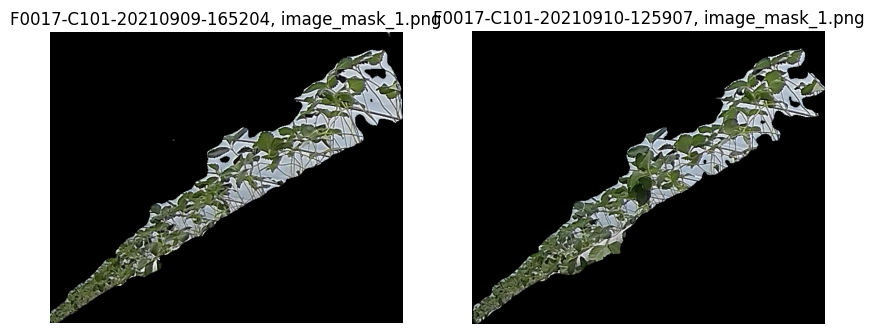

In [89]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210909-125906"]
nov2 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210910-075907"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20210916-125904
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20210916-075907
mask_num_x                                  F0017-C101-20210916-125904_1
mask_id                                 67c44f01186d42c9e0524b25cf754591
point_x_x                                                     960.037537
point_y_x                                                     202.914581
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20210916-165204
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

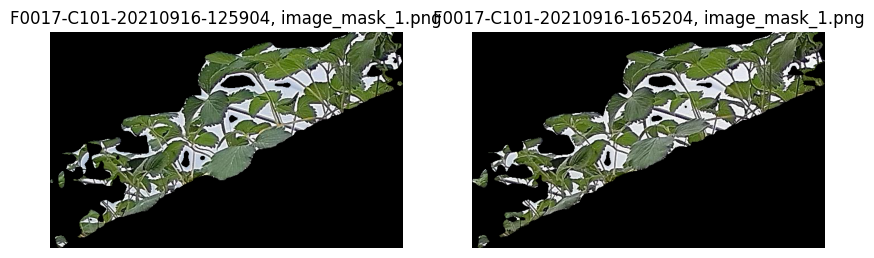

In [97]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210916-075907"]
nov2 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210916-125904"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20210919-165203
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20210919-125904
mask_num_x                                  F0017-C101-20210919-165203_1
mask_id                                 e9eaad4ad8340d493acd3b5bacd1399b
point_x_x                                                     193.467148
point_y_x                                                     241.373062
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20210920-075904
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

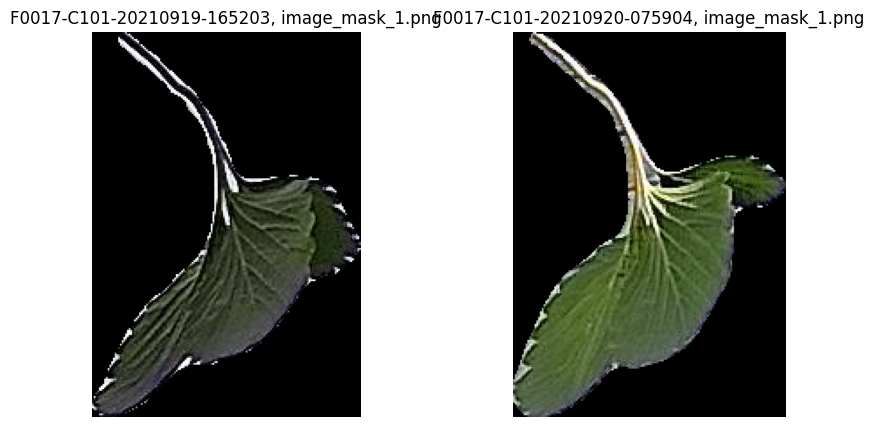

In [100]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210919-125904"]
nov2 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210919-165203"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20210921-075904
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20210920-165206
mask_num_x                                  F0017-C101-20210921-075904_1
mask_id                                 e9eaad4ad8340d493acd3b5bacd1399b
point_x_x                                                     204.915405
point_y_x                                                     234.950729
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20210921-125907
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

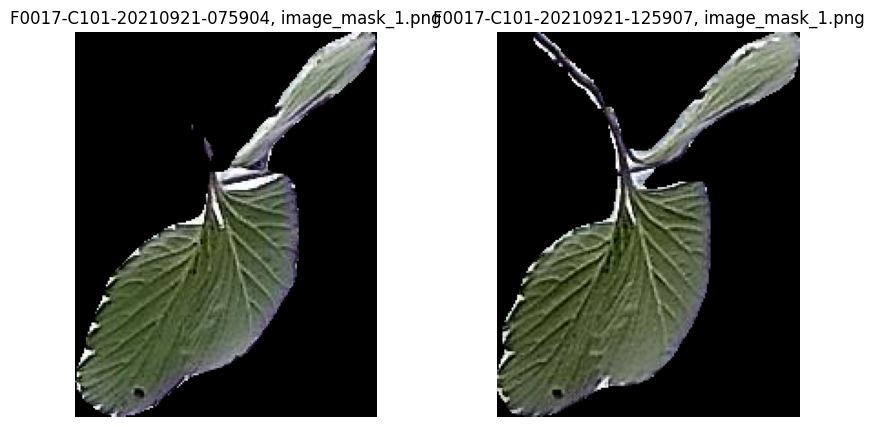

In [101]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210920-165206"]
nov2 = sep_2021[sep_2021["before_img_name"] == "F0017-C101-20210921-075904"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

### 2021년 10월

In [63]:
### 2021년 10월에 해당하는 이미지 필터링
oct_2021 = f0017[(f0017["측정년도"] == 2021) & (f0017["측정월"] == 10)]

# 측정 일자를 datetime으로 변환
oct_2021["측정일자"] = pd.to_datetime(oct_2021["측정일자"])

/tmp/ipykernel_263817/89596898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_2021["측정일자"] = pd.to_datetime(oct_2021["측정일자"])


In [66]:
oct_2021.head(3)

,check_datetime,측정일자,구역명,farm_code,내부온도,내부습도,내부CO2,근권온도,내부순간일사량,측정년도,측정월,input_image_name,input_image_path,img_id,area_code,shot_datetime,count_masks,bbox_image_path,before_img_name,before_img_id,mask_num,mask_id,point_x,point_y,size,color,output_image_path
59,2021-10-01 16:50:00,2021-10-01,1구역,F0017,29.93,57.63,446.3,23.85,50.71,2021.0,10.0,F0017-C101-20211001-165208,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,d66c4b0ca77903e0716feb54f96b815d,C101,2021-10-01 16:52:08,3.0,/opt/dlami/nvme/SAM_result/F0017/C101/F0017-C1...,F0017-C101-20211001-125905,a84ccb6ec2907cbcdcbdfca1d0761bcb,F0017-C101-20211001-165208_1,67c44f01186d42c9e0524b25cf754591,960.144653,198.916718,73319,"[[194, 212, 222], [199, 218, 225], [196, 215, ...",image_mask_1.png
60,2021-10-01 16:50:00,2021-10-01,1구역,F0017,29.93,57.63,446.3,23.85,50.71,2021.0,10.0,F0017-C101-20211001-165208,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,d66c4b0ca77903e0716feb54f96b815d,C101,2021-10-01 16:52:08,3.0,/opt/dlami/nvme/SAM_result/F0017/C101/F0017-C1...,F0017-C101-20211001-125905,a84ccb6ec2907cbcdcbdfca1d0761bcb,F0017-C101-20211001-165208_2,8bd8516161a651f71faa6fe79e7ad838,1744.359009,8.909178,600,"[[242, 228, 215], [233, 217, 202], [255, 249, ...",image_mask_2.png
61,2021-10-01 16:50:00,2021-10-01,1구역,F0017,29.93,57.63,446.3,23.85,50.71,2021.0,10.0,F0017-C101-20211001-165208,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,d66c4b0ca77903e0716feb54f96b815d,C101,2021-10-01 16:52:08,3.0,/opt/dlami/nvme/SAM_result/F0017/C101/F0017-C1...,F0017-C101-20211001-125905,a84ccb6ec2907cbcdcbdfca1d0761bcb,F0017-C101-20211001-165208_3,da7af67d5d876acedcf6f6b3f0c72191,2239.987549,595.709473,7156,"[[168, 150, 140], [80, 62, 52], [14, 0, 0], [1...",image_mask_3.png


In [64]:
oct_2021['before_img_name'].unique()

array(['F0017-C101-20211001-125905', 'F0017-C101-20211002-075906',
       'F0017-C101-20211002-125905', 'F0017-C101-20211002-165203',
       'F0017-C101-20211003-125931', 'F0017-C101-20211003-165205',
       'F0017-C101-20211004-125906', 'F0017-C101-20211005-075906',
       'F0017-C101-20211005-125906', 'F0017-C101-20211005-165203',
       'F0017-C101-20211006-075905', 'F0017-C101-20211006-125906',
       'F0017-C101-20211008-075905', 'F0017-C101-20211008-125904',
       'F0017-C101-20211008-165204', 'F0017-C101-20211009-075907',
       'F0017-C101-20211009-125905', 'F0017-C101-20211009-165204',
       'F0017-C101-20211010-075908', 'F0017-C101-20211010-125904',
       'F0017-C101-20211010-165204', 'F0017-C101-20211011-125906',
       'F0017-C101-20211011-165204', 'F0017-C101-20211012-075907',
       'F0017-C101-20211013-075906', 'F0017-C101-20211013-125904',
       'F0017-C101-20211013-165204', 'F0017-C101-20211014-075904',
       'F0017-C101-20211014-125905', 'F0017-C101-20211014-1652

In [70]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = oct_2021[oct_2021["before_img_name"] == "F0017-C101-20211001-125905"]
nov2 = oct_2021[oct_2021["before_img_name"] == "F0017-C101-20211002-075906"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

In [74]:
nov0506.head()

,farm_code_x,input_image_name_x,input_image_path_x,area_code_x,before_img_name_x,mask_num_x,mask_id,point_x_x,point_y_x,output_image_path_x,farm_code_y,input_image_name_y,input_image_path_y,area_code_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,output_image_path_y
0,NaN,NaN,NaN,NaN,NaN,NaN,382aaa8e475aca30d44445d190be5c02,NaN,NaN,NaN,F0017,F0017-C101-20211002-125905,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211002-075906,42a7bf0c317a3390f63db57cce0a0ff2,F0017-C101-20211002-125905_1,335.704529,482.75824,image_mask_1.png
1,F0017,F0017-C101-20211001-165208,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211001-125905,F0017-C101-20211001-165208_1,67c44f01186d42c9e0524b25cf754591,960.144653,198.916718,image_mask_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F0017,F0017-C101-20211001-165208,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211001-125905,F0017-C101-20211001-165208_2,8bd8516161a651f71faa6fe79e7ad838,1744.359009,8.909178,image_mask_2.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F0017,F0017-C101-20211001-165208,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211001-125905,F0017-C101-20211001-165208_3,da7af67d5d876acedcf6f6b3f0c72191,2239.987549,595.709473,image_mask_3.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

In [73]:
def visualize_mask(input_img_name_x, input_img_name_y, farm_code_x, farm_code_y, area_code_x, area_code_y, mask_id_x, mask_id_y, base_folder):
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        visualize_mask(row["input_image_name_x"], row["input_image_name_y"], row["farm_code_x"], row["farm_code_y"], row["area_code_x"], row["area_code_y"], row["output_image_path_x"], row["output_image_path_y"], base_folder)


In [76]:
### 2021년 9월에 해당하는 이미지 필터링
nov_2021 = f0017[(f0017["측정년도"] == 2021) & (f0017["측정월"] == 11)]

# 측정 일자를 datetime으로 변환
nov_2021["측정일자"] = pd.to_datetime(nov_2021["측정일자"])

# 날짜 필터링
nov_2021 = nov_2021[(nov_2021["측정일자"].dt.weekday == 0) | (nov_2021["측정일자"].dt.weekday == 1)]

nov_2021['before_img_name'].unique()

/tmp/ipykernel_263817/2344040778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nov_2021["측정일자"] = pd.to_datetime(nov_2021["측정일자"])


array(['F0017-C101-20211025-165204', 'F0017-C101-20211101-075902',
       'F0017-C101-20211101-125902', 'F0017-C101-20211101-165203',
       'F0017-C101-20211102-075902', 'F0017-C101-20211102-125902',
       'F0017-C101-20211107-155903', 'F0017-C101-20211108-075902',
       'F0017-C101-20211108-125903', 'F0017-C101-20211108-165202',
       'F0017-C101-20211109-075903', 'F0017-C101-20211109-125902',
       'F0017-C101-20211114-165202', 'F0017-C101-20211115-075903',
       'F0017-C101-20211115-125903', 'F0017-C101-20211115-165202',
       'F0017-C101-20211116-075903', 'F0017-C101-20211116-115902',
       'F0017-C101-20211121-165203', 'F0017-C101-20211122-075902',
       'F0017-C101-20211122-125903', 'F0017-C101-20211122-165202',
       'F0017-C101-20211123-075902', 'F0017-C101-20211123-125902',
       'F0017-C101-20211128-165202', 'F0017-C101-20211129-075903',
       'F0017-C101-20211129-125903', 'F0017-C101-20211129-165202',
       'F0017-C101-20211130-075903', 'F0017-C101-20211130-1259

In [79]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = nov_2021[nov_2021["before_img_name"] == "F0017-C101-20211115-125903"]
nov2 = nov_2021[nov_2021["before_img_name"] == "F0017-C101-20211115-165202"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

nov0506.head(5)

,farm_code_x,input_image_name_x,input_image_path_x,area_code_x,before_img_name_x,mask_num_x,mask_id,point_x_x,point_y_x,output_image_path_x,farm_code_y,input_image_name_y,input_image_path_y,area_code_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,output_image_path_y
0,F0017,F0017-C101-20211115-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-125903,F0017-C101-20211115-165202_4,1566e770c31a62f22502cea7aa5592c0,912.454773,300.846069,image_mask_4.png,F0017,F0017-C101-20211116-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-165202,54a524dfd8a6dd68a8b95195845d33c4,F0017-C101-20211116-075903_7,913.854980,303.851746,image_mask_7.png
1,F0017,F0017-C101-20211115-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-125903,F0017-C101-20211115-165202_5,37c0044c27f40dea6e4f6eaf8784c1aa,697.807617,412.243988,image_mask_5.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F0017,F0017-C101-20211115-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-125903,F0017-C101-20211115-165202_3,4fc5a570f45ccf9cc2ad15d95236f00c,815.686646,322.596649,image_mask_3.png,F0017,F0017-C101-20211116-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-165202,54a524dfd8a6dd68a8b95195845d33c4,F0017-C101-20211116-075903_4,815.198303,324.837738,image_mask_4.png
3,NaN,NaN,NaN,NaN,NaN,NaN,587ae2f2219c60e4554159e6c62916c8,NaN,NaN,NaN,F0017,F0017-C101-20211116-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-165202,54a524dfd8a6dd68a8b95195845d33c4,F0017-C101-20211116-075903_6,708.832764,399.396332,image_mask_6.png
4,F0017,F0017-C101-20211115-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211115-125903,F0017-C101-20211115-165202_1,682854e695af6a15ddf19e818b949420,336.486359,444.437500,image_mask_1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211115-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211115-125903
mask_num_x                                  F0017-C101-20211115-165202_4
mask_id                                 1566e770c31a62f22502cea7aa5592c0
point_x_x                                                     912.454773
point_y_x                                                     300.846069
output_image_path_x                                     image_mask_4.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211116-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

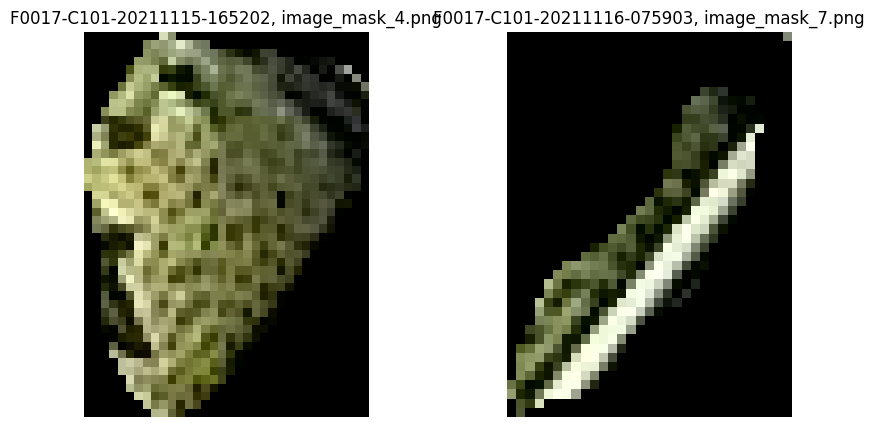

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211115-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211115-125903
mask_num_x                                  F0017-C101-20211115-165202_3
mask_id                                 4fc5a570f45ccf9cc2ad15d95236f00c
point_x_x                                                     815.686646
point_y_x                                                     322.596649
output_image_path_x                                     image_mask_3.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211116-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

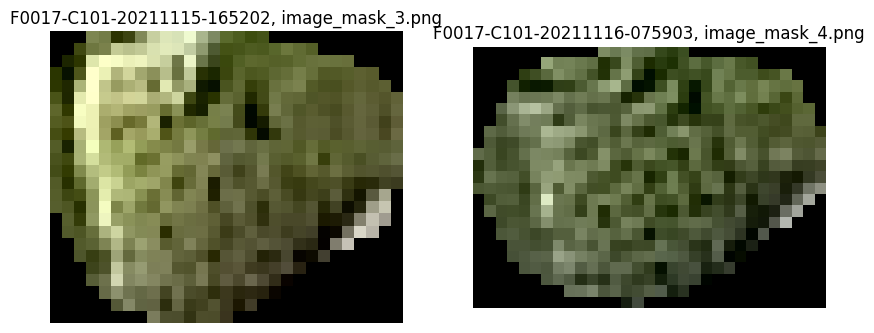

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211115-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211115-125903
mask_num_x                                  F0017-C101-20211115-165202_6
mask_id                                 7b18d7831fca03f54c2210f971e30943
point_x_x                                                     885.508301
point_y_x                                                     324.606323
output_image_path_x                                     image_mask_6.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211116-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

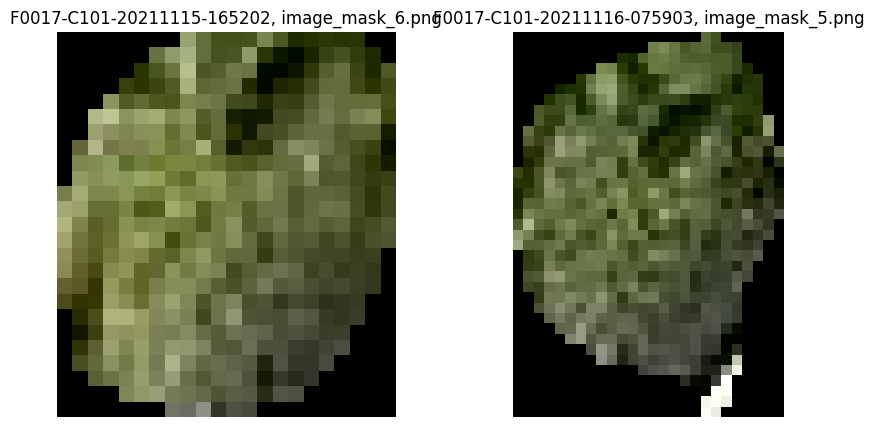

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211115-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211115-125903
mask_num_x                                  F0017-C101-20211115-165202_7
mask_id                                 ce2c9dce309e20483a8d7986fc29fc1d
point_x_x                                                    1424.051392
point_y_x                                                      76.278069
output_image_path_x                                     image_mask_7.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211116-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

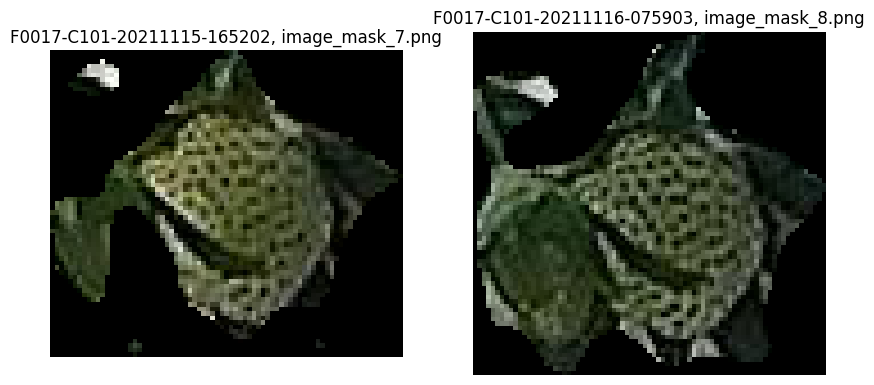

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211115-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211115-125903
mask_num_x                                  F0017-C101-20211115-165202_8
mask_id                                 ce2c9dce309e20483a8d7986fc29fc1d
point_x_x                                                    1425.887085
point_y_x                                                      83.268539
output_image_path_x                                     image_mask_8.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211116-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

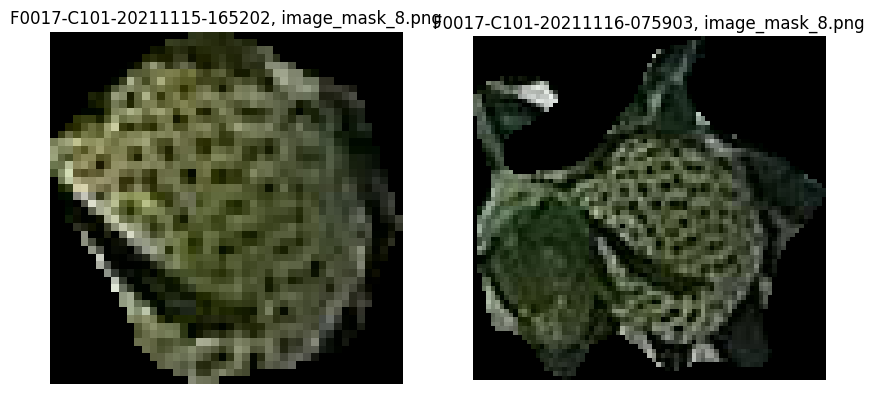

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211115-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211115-125903
mask_num_x                                  F0017-C101-20211115-165202_2
mask_id                                 e618c8da63ecdeb7bcc8ad417a6b190b
point_x_x                                                     854.354004
point_y_x                                                     324.166809
output_image_path_x                                     image_mask_2.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211116-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

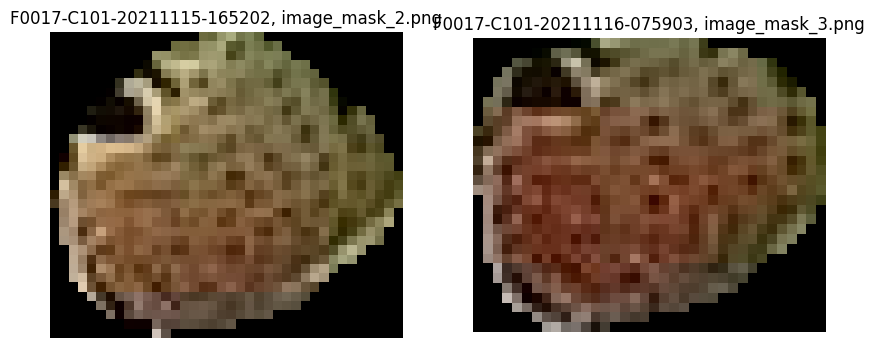

In [80]:
def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

In [81]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = nov_2021[nov_2021["before_img_name"] == "F0017-C101-20211128-165202"]
nov2 = nov_2021[nov_2021["before_img_name"] == "F0017-C101-20211129-075903"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

nov0506.head()

,farm_code_x,input_image_name_x,input_image_path_x,area_code_x,before_img_name_x,mask_num_x,mask_id,point_x_x,point_y_x,output_image_path_x,farm_code_y,input_image_name_y,input_image_path_y,area_code_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,output_image_path_y
0,F0017,F0017-C101-20211129-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211128-165202,F0017-C101-20211129-075903_25,02ea6f0da3b4b8273723303ec920d764,893.534973,386.533630,image_mask_25.png,F0017,F0017-C101-20211129-125903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-075903,de4a5bdee54c6eac053c9f936c16f516,F0017-C101-20211129-125903_19,898.247986,388.800873,image_mask_19.png
1,F0017,F0017-C101-20211129-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211128-165202,F0017-C101-20211129-075903_9,098f6ae056e37b6a678b7909d210569b,194.452850,286.888458,image_mask_9.png,F0017,F0017-C101-20211129-125903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-075903,de4a5bdee54c6eac053c9f936c16f516,F0017-C101-20211129-125903_12,188.020355,292.860229,image_mask_12.png
2,F0017,F0017-C101-20211129-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211128-165202,F0017-C101-20211129-075903_7,0ec7654288b21bbf951c10c7f1cbe638,65.780563,452.233734,image_mask_7.png,F0017,F0017-C101-20211129-125903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-075903,de4a5bdee54c6eac053c9f936c16f516,F0017-C101-20211129-125903_5,61.740574,455.617432,image_mask_5.png
3,F0017,F0017-C101-20211129-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211128-165202,F0017-C101-20211129-075903_18,144fe5ccb422648c95bdc2ab462625fb,16.183712,587.575989,image_mask_18.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F0017,F0017-C101-20211129-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211128-165202,F0017-C101-20211129-075903_5,167250cd99e21b86a381686cab560708,161.530273,277.222260,image_mask_5.png,F0017,F0017-C101-20211129-125903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-075903,de4a5bdee54c6eac053c9f936c16f516,F0017-C101-20211129-125903_10,157.570755,282.837402,image_mask_10.png


farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_25
mask_id                                 02ea6f0da3b4b8273723303ec920d764
point_x_x                                                     893.534973
point_y_x                                                      386.53363
output_image_path_x                                    image_mask_25.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

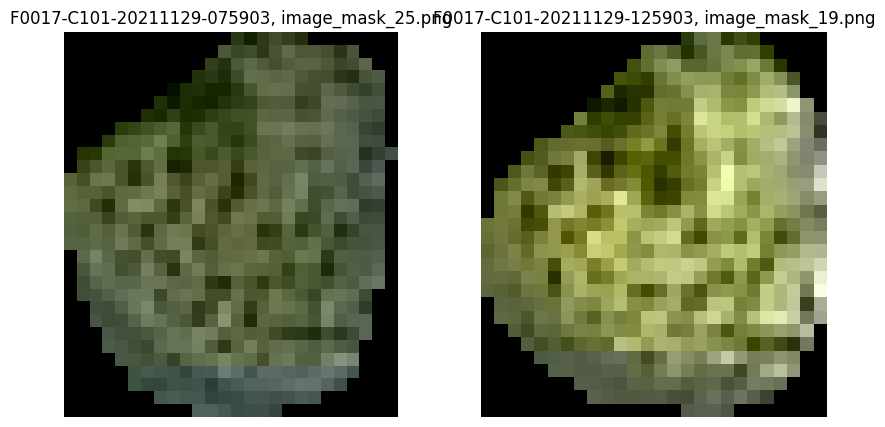

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_9
mask_id                                 098f6ae056e37b6a678b7909d210569b
point_x_x                                                      194.45285
point_y_x                                                     286.888458
output_image_path_x                                     image_mask_9.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

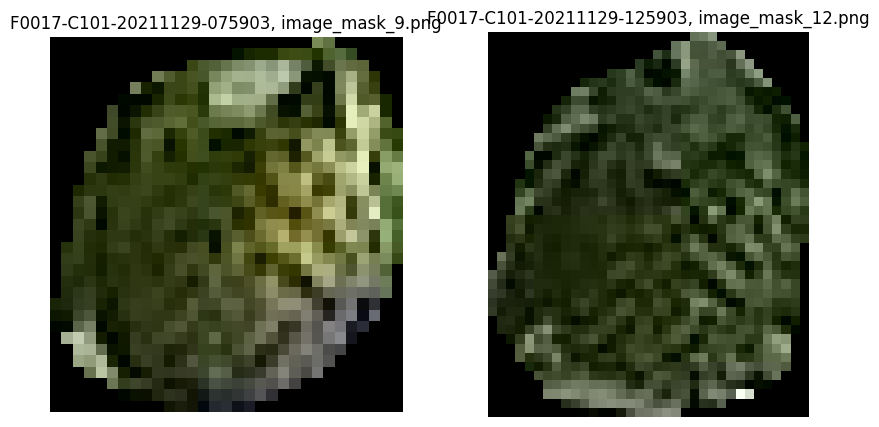

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_7
mask_id                                 0ec7654288b21bbf951c10c7f1cbe638
point_x_x                                                      65.780563
point_y_x                                                     452.233734
output_image_path_x                                     image_mask_7.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

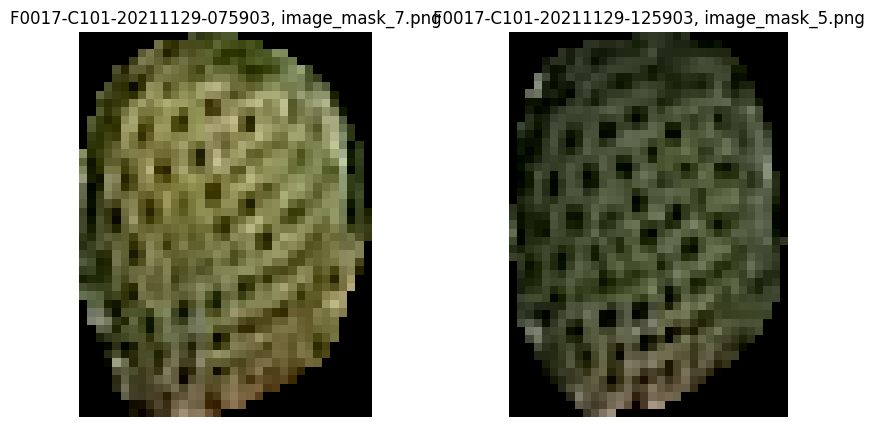

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_5
mask_id                                 167250cd99e21b86a381686cab560708
point_x_x                                                     161.530273
point_y_x                                                      277.22226
output_image_path_x                                     image_mask_5.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

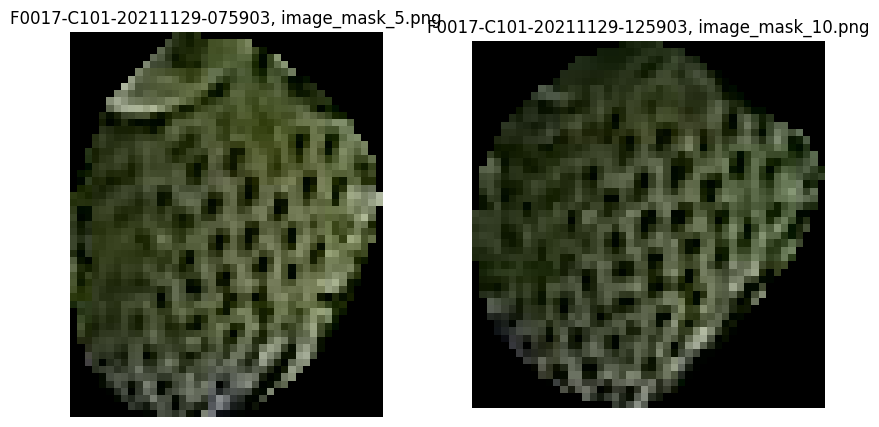

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_14
mask_id                                 1b770bae29b8c494c3b584339d7f22f8
point_x_x                                                     118.509048
point_y_x                                                     488.797668
output_image_path_x                                    image_mask_14.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

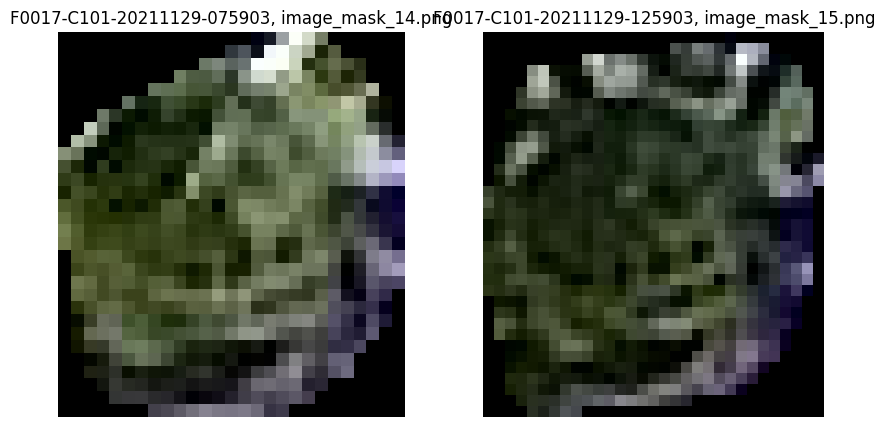

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_17
mask_id                                 3460fbd818154bba28c1597704b4dffe
point_x_x                                                      461.14563
point_y_x                                                     542.671265
output_image_path_x                                    image_mask_17.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

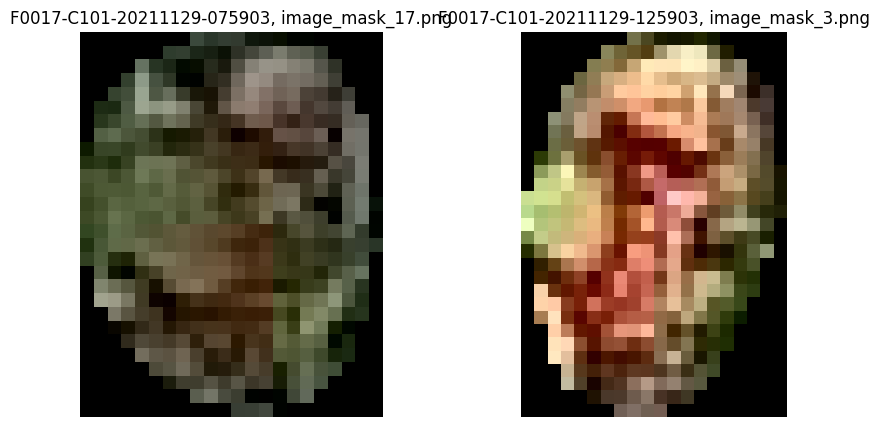

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_19
mask_id                                 36de618f65b5ed4461c6d304d55a906a
point_x_x                                                     975.883057
point_y_x                                                     533.228638
output_image_path_x                                    image_mask_19.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

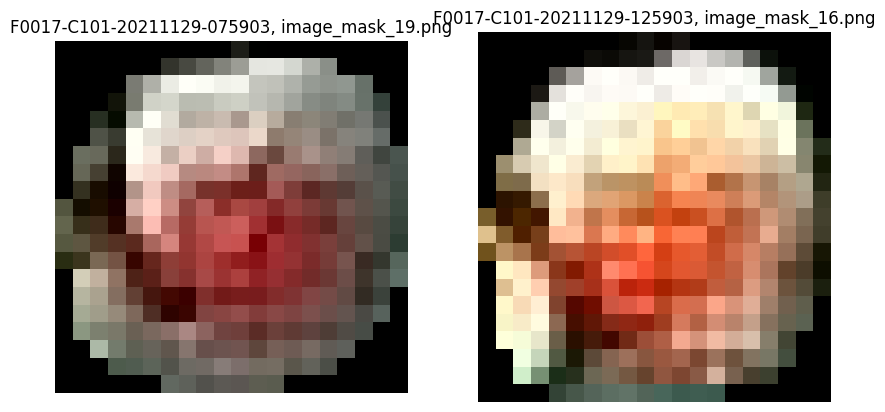

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_4
mask_id                                 446807a9d97275b6adf802ed15368377
point_x_x                                                     103.509018
point_y_x                                                     286.887634
output_image_path_x                                     image_mask_4.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

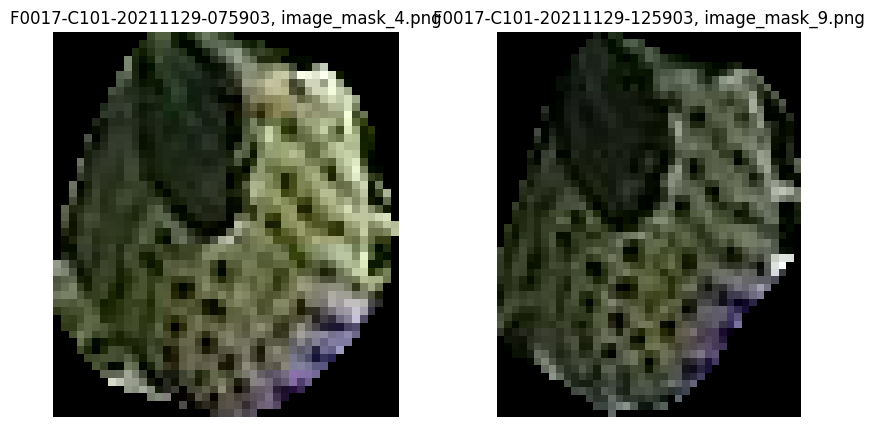

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_26
mask_id                                 714e4cd6b0753e7aacce077ea60083c8
point_x_x                                                    1420.795654
point_y_x                                                     153.647507
output_image_path_x                                    image_mask_26.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

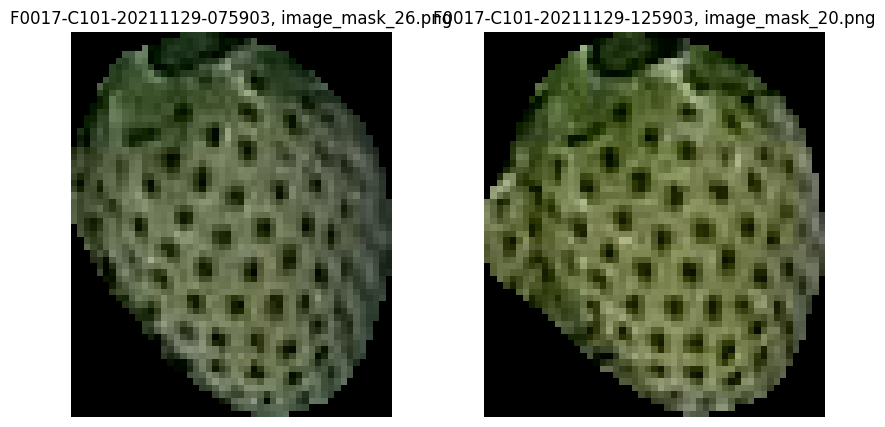

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_10
mask_id                                 75203848e9041acb23fae370d2c3368f
point_x_x                                                     225.543121
point_y_x                                                      52.809681
output_image_path_x                                    image_mask_10.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

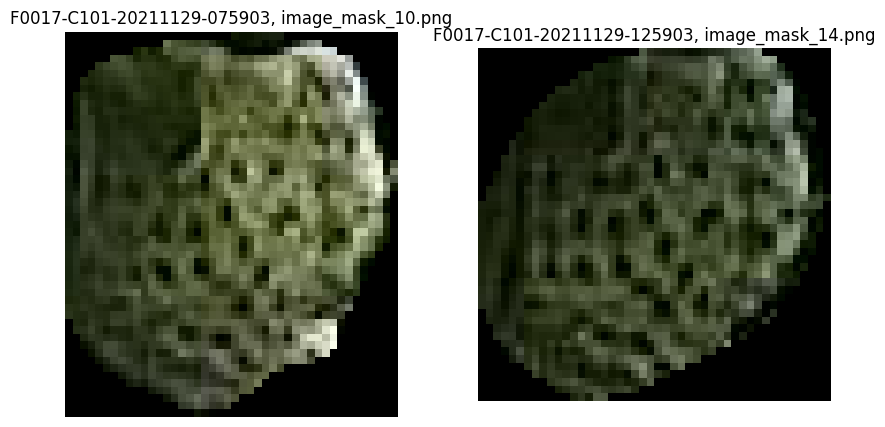

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_27
mask_id                                 80751570a5c82bdd7f744b7d24f0ad7b
point_x_x                                                    1375.927734
point_y_x                                                     187.740753
output_image_path_x                                    image_mask_27.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

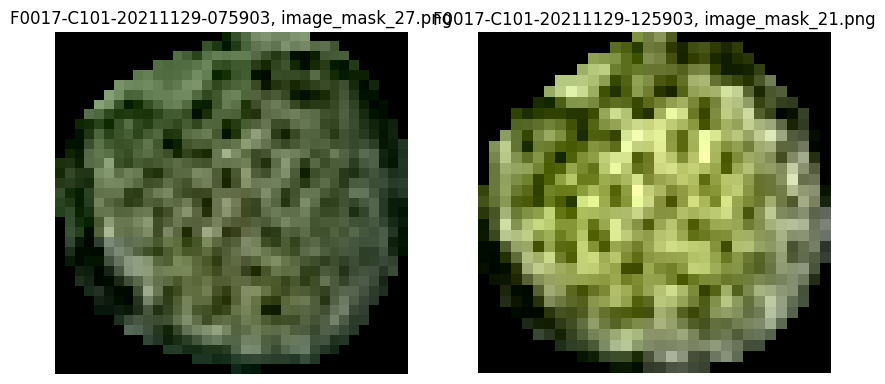

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_8
mask_id                                 871f90ea47387dd6a88f1b4608543556
point_x_x                                                      94.667419
point_y_x                                                     499.381653
output_image_path_x                                     image_mask_8.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

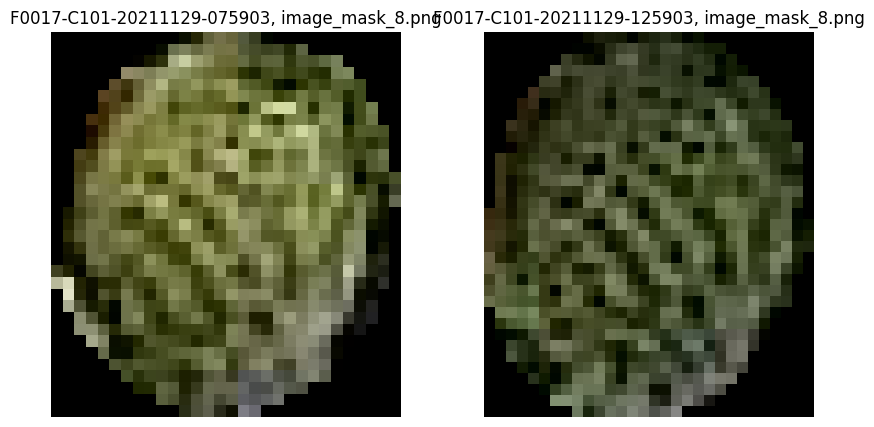

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_15
mask_id                                 896b306c80f36f641ddf25a547d8e159
point_x_x                                                      116.36689
point_y_x                                                     376.144775
output_image_path_x                                    image_mask_15.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

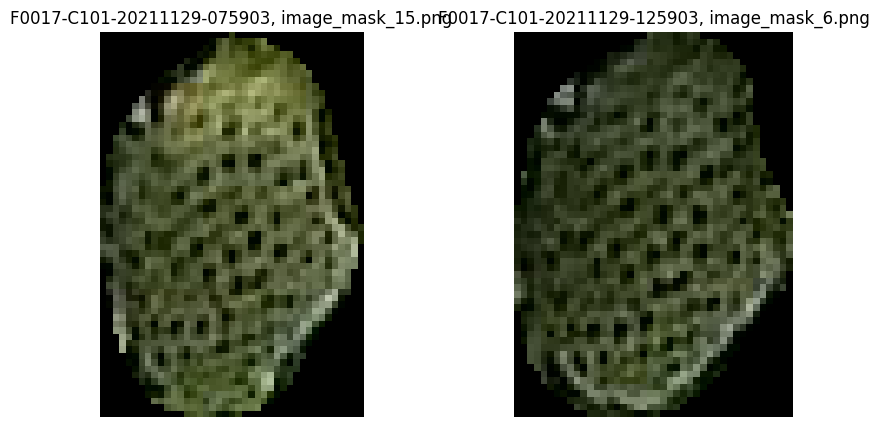

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_3
mask_id                                 8b498dcd727757f76e5fc1540f6eed07
point_x_x                                                     146.347321
point_y_x                                                     357.952484
output_image_path_x                                     image_mask_3.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

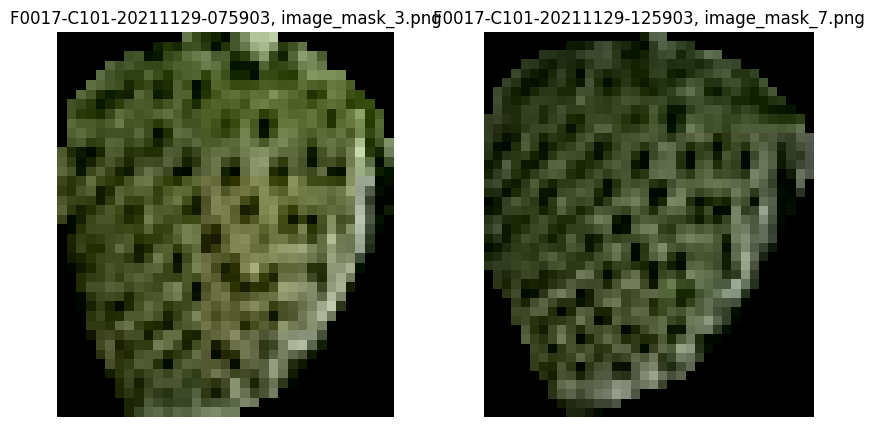

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_32
mask_id                                 aa51ce849ad2f746ae916b011087b764
point_x_x                                                    1301.954468
point_y_x                                                     162.366028
output_image_path_x                                    image_mask_32.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

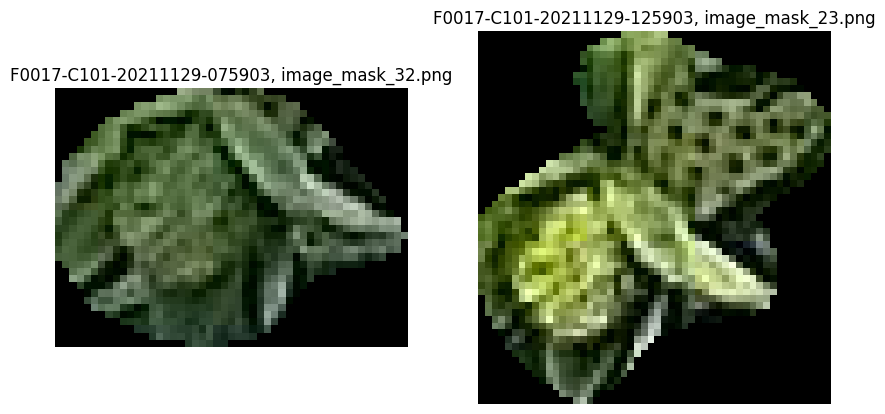

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_28
mask_id                                 b01390792527d8b372fe9f3c84c7a5ec
point_x_x                                                    1353.243896
point_y_x                                                     130.822296
output_image_path_x                                    image_mask_28.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

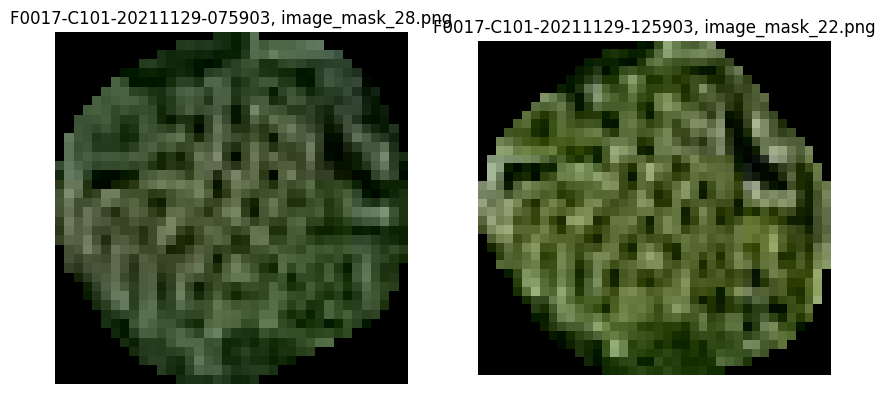

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_12
mask_id                                 c8712aaefbfac85343f53cdd7cfbdd58
point_x_x                                                      71.087494
point_y_x                                                     490.432373
output_image_path_x                                    image_mask_12.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

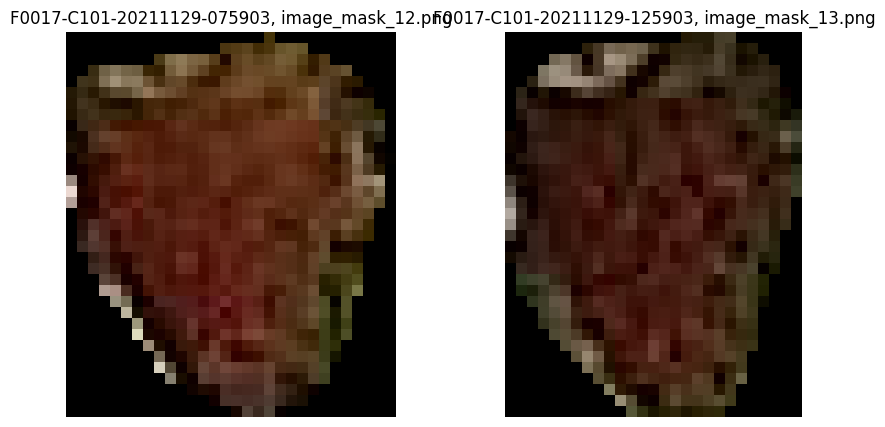

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_20
mask_id                                 cfaf6a90214892915bd56fd49e019958
point_x_x                                                     910.031738
point_y_x                                                     358.581177
output_image_path_x                                    image_mask_20.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

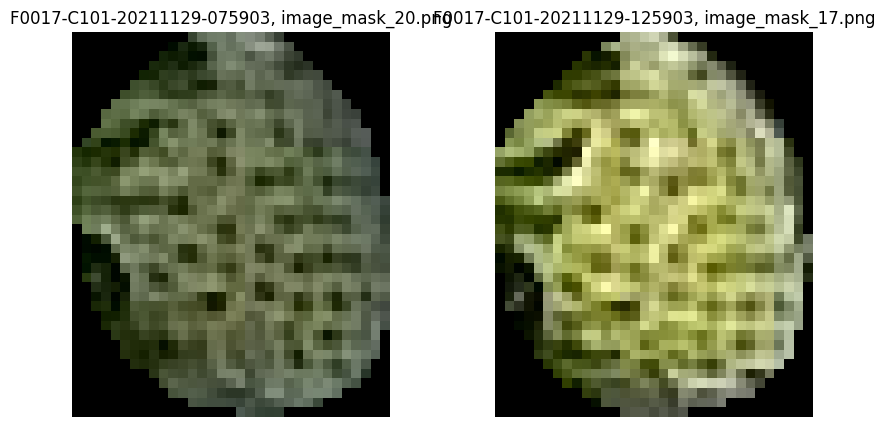

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_16
mask_id                                 da575cd4a0e4c9670fb45fa1f7a36431
point_x_x                                                      97.318993
point_y_x                                                     436.849579
output_image_path_x                                    image_mask_16.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

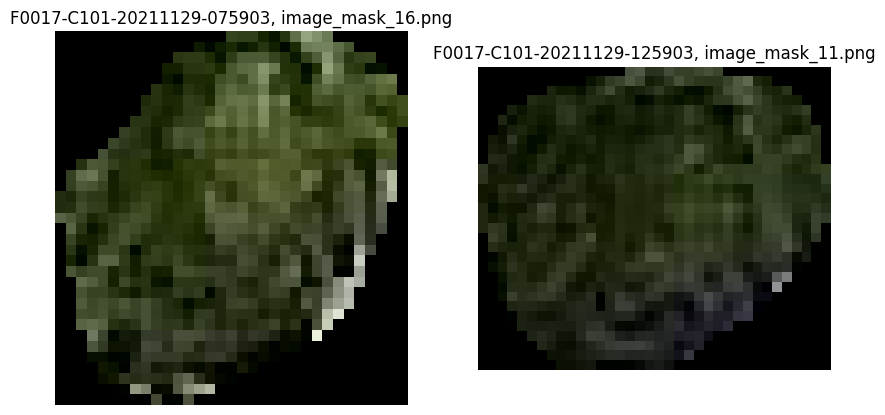

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                 F0017-C101-20211129-075903_30
mask_id                                 dfb6e455d95d6f993607e65a10aac3a3
point_x_x                                                    1309.435059
point_y_x                                                     134.820114
output_image_path_x                                    image_mask_30.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

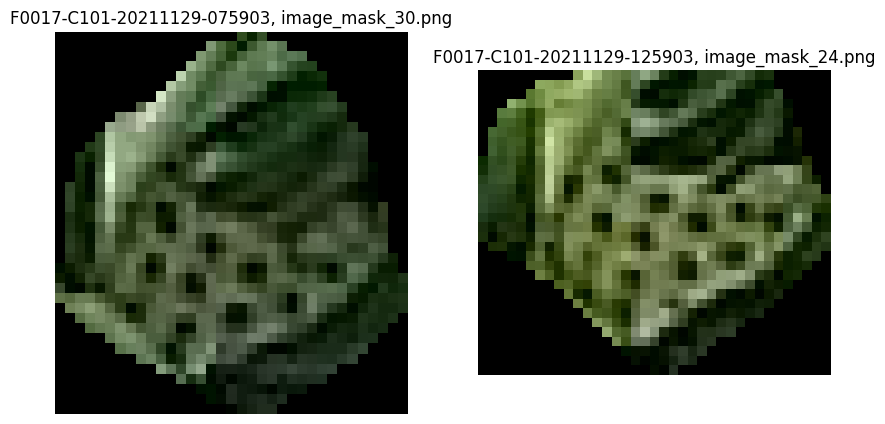

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_1
mask_id                                 e7184463cda2635a26a114bb3da73e31
point_x_x                                                     125.518143
point_y_x                                                     190.218597
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

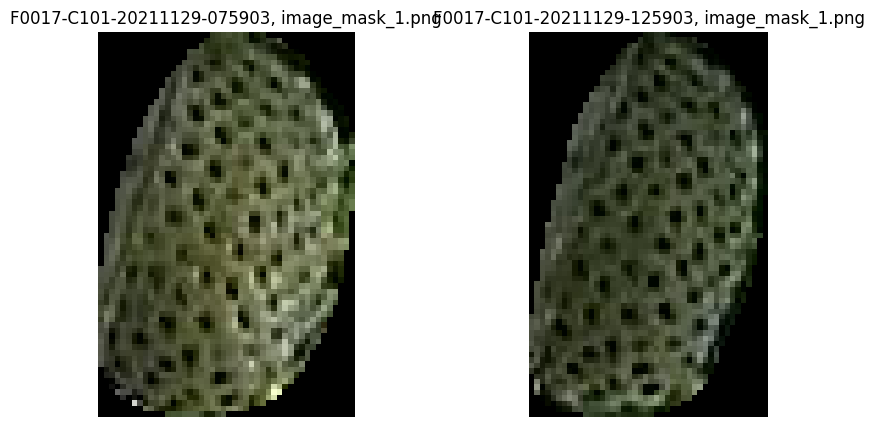

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_2
mask_id                                 ec7280ca61a3ceb64b1edb32745ef205
point_x_x                                                     333.011505
point_y_x                                                     601.740723
output_image_path_x                                     image_mask_2.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

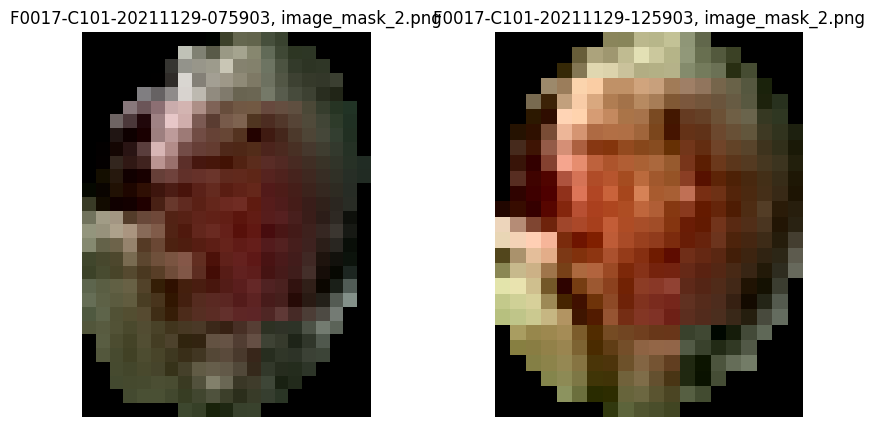

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-075903
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211128-165202
mask_num_x                                  F0017-C101-20211129-075903_6
mask_id                                 f6d64b72679a00c53a5165a428677973
point_x_x                                                     230.263992
point_y_x                                                      92.388199
output_image_path_x                                     image_mask_6.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211129-125903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

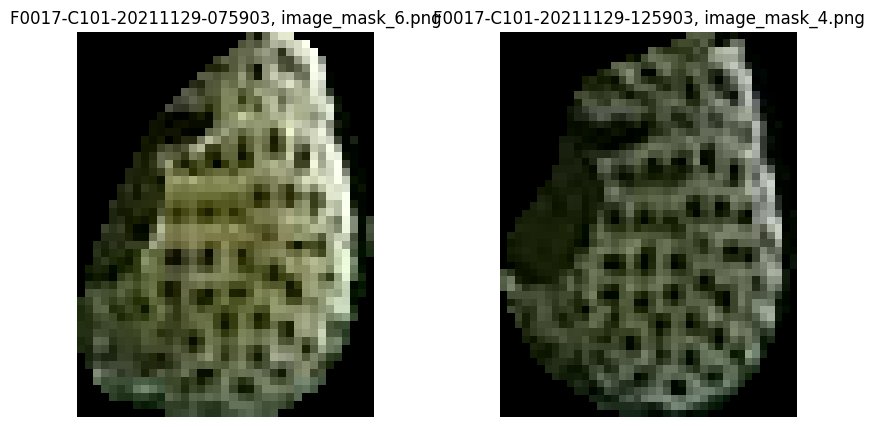

In [82]:
def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_7
mask_id                                 098f6ae056e37b6a678b7909d210569b
point_x_x                                                     189.692245
point_y_x                                                     289.297119
output_image_path_x                                     image_mask_7.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

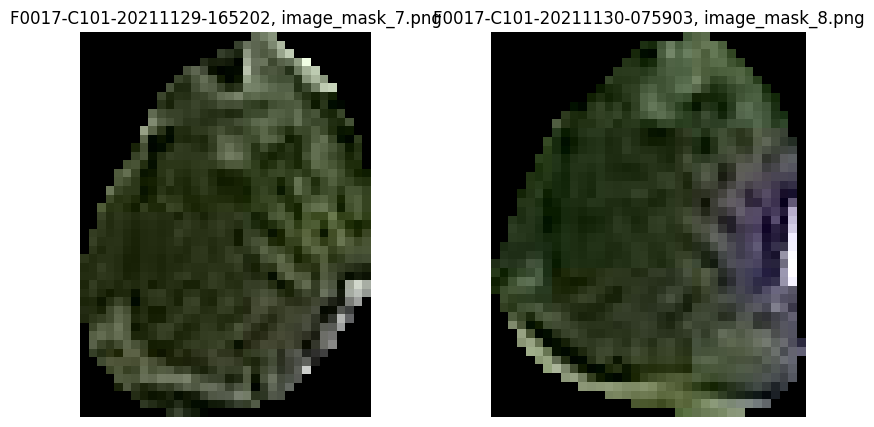

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_4
mask_id                                 0ec7654288b21bbf951c10c7f1cbe638
point_x_x                                                      62.504658
point_y_x                                                     455.395935
output_image_path_x                                     image_mask_4.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

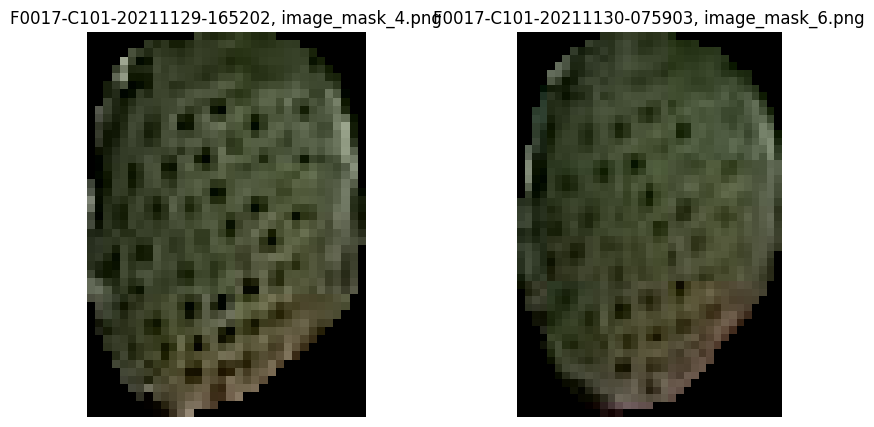

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_6
mask_id                                 167250cd99e21b86a381686cab560708
point_x_x                                                     157.214737
point_y_x                                                     282.213959
output_image_path_x                                     image_mask_6.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

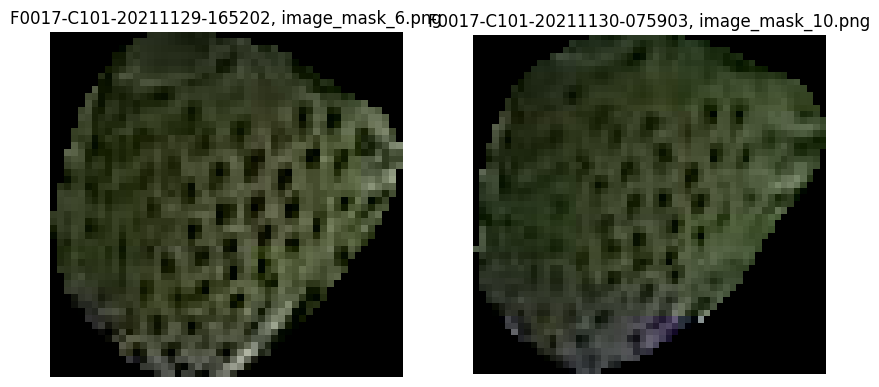

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_14
mask_id                                 3432cc1f57ed7e80d4e0e855215ea50b
point_x_x                                                     262.958679
point_y_x                                                       5.449702
output_image_path_x                                    image_mask_14.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

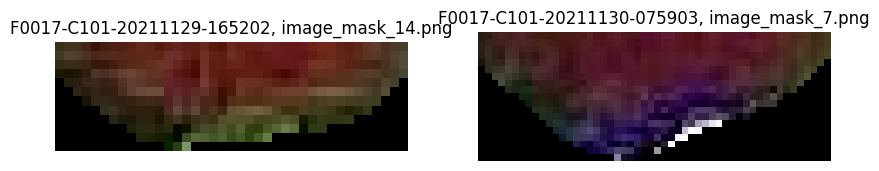

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_8
mask_id                                 3460fbd818154bba28c1597704b4dffe
point_x_x                                                     462.768433
point_y_x                                                     543.457153
output_image_path_x                                     image_mask_8.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

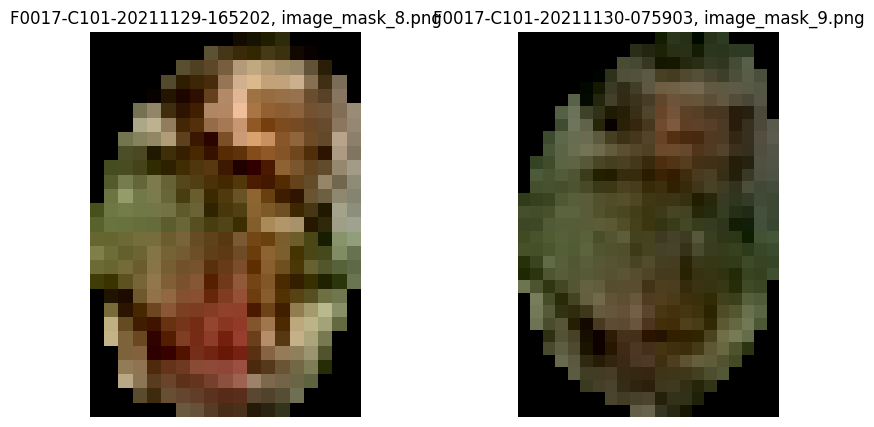

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_18
mask_id                                 36de618f65b5ed4461c6d304d55a906a
point_x_x                                                     975.778809
point_y_x                                                      533.97229
output_image_path_x                                    image_mask_18.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

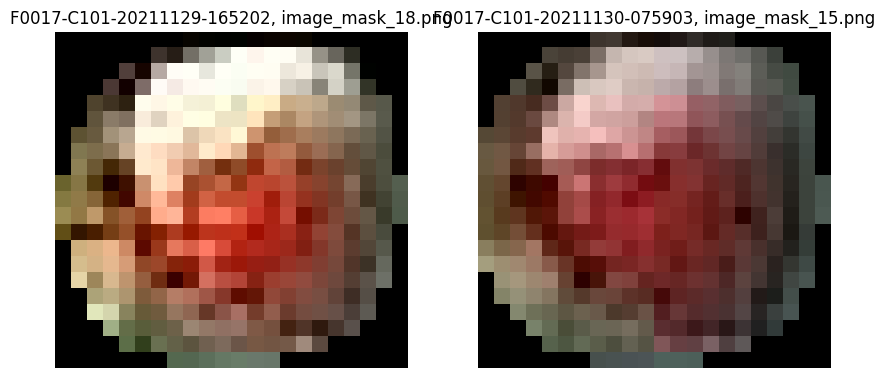

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_5
mask_id                                 446807a9d97275b6adf802ed15368377
point_x_x                                                     100.115189
point_y_x                                                     289.758911
output_image_path_x                                     image_mask_5.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

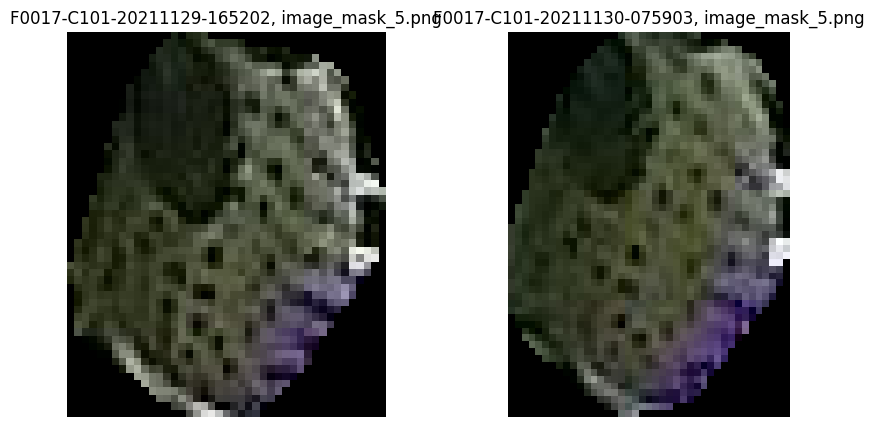

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_23
mask_id                                 714e4cd6b0753e7aacce077ea60083c8
point_x_x                                                    1421.647949
point_y_x                                                     154.472015
output_image_path_x                                    image_mask_23.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

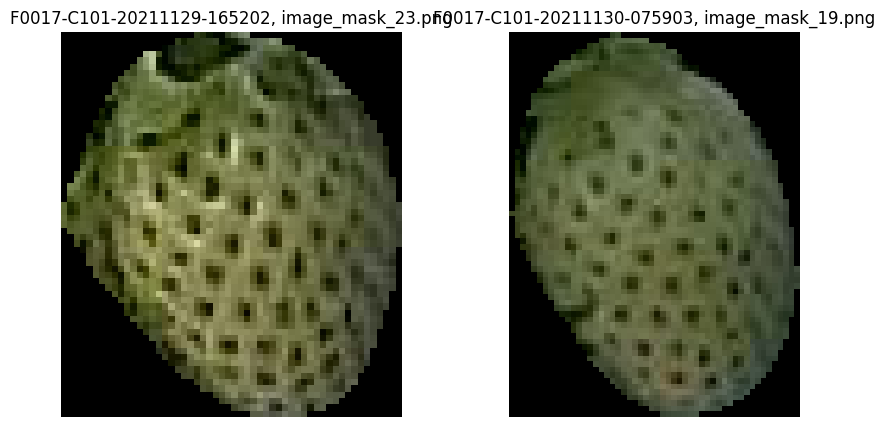

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_11
mask_id                                 75203848e9041acb23fae370d2c3368f
point_x_x                                                     217.180756
point_y_x                                                      53.757778
output_image_path_x                                    image_mask_11.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

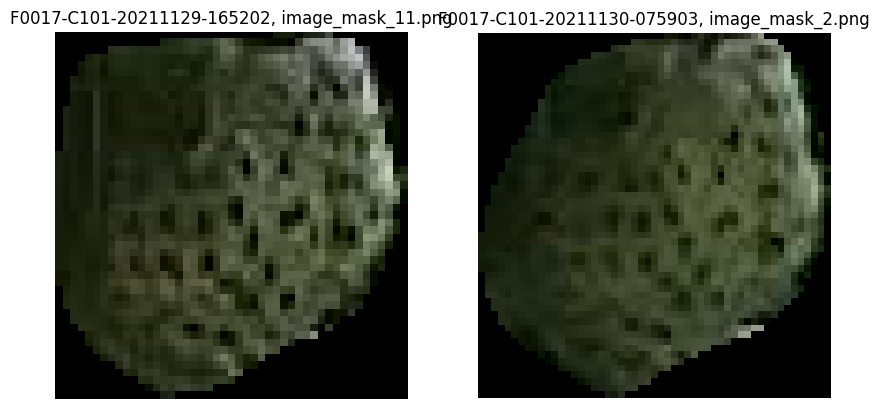

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_15
mask_id                                 75203848e9041acb23fae370d2c3368f
point_x_x                                                     224.512421
point_y_x                                                      56.424355
output_image_path_x                                    image_mask_15.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

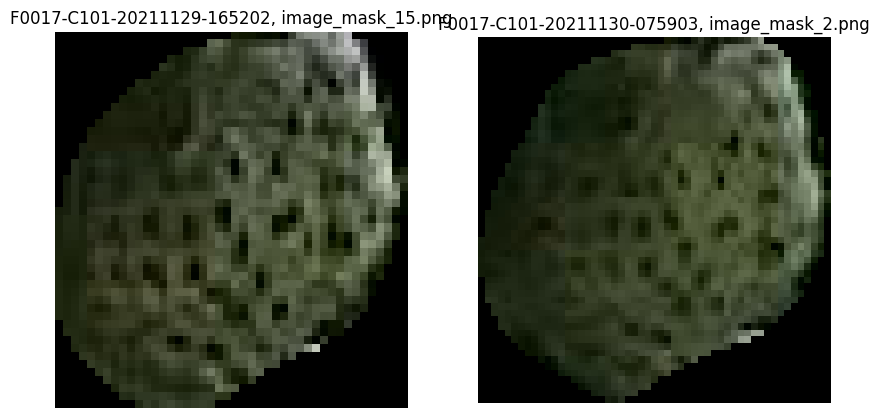

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_9
mask_id                                 871f90ea47387dd6a88f1b4608543556
point_x_x                                                      91.688217
point_y_x                                                     500.002197
output_image_path_x                                     image_mask_9.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

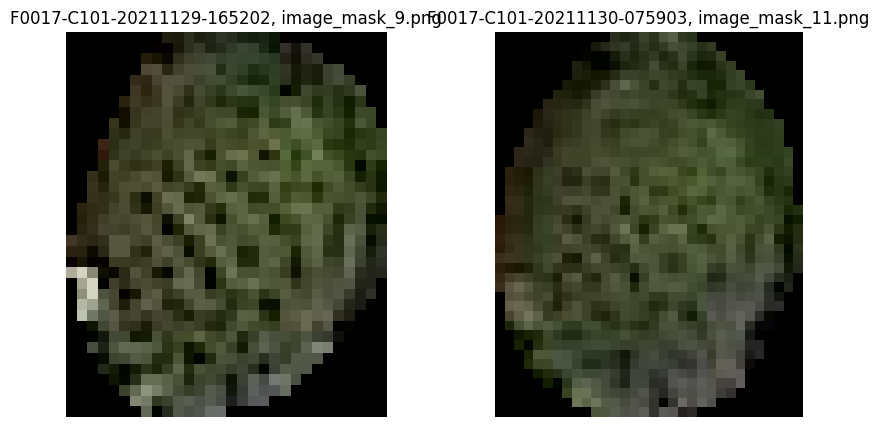

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_10
mask_id                                 896b306c80f36f641ddf25a547d8e159
point_x_x                                                     113.216599
point_y_x                                                     381.096527
output_image_path_x                                    image_mask_10.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

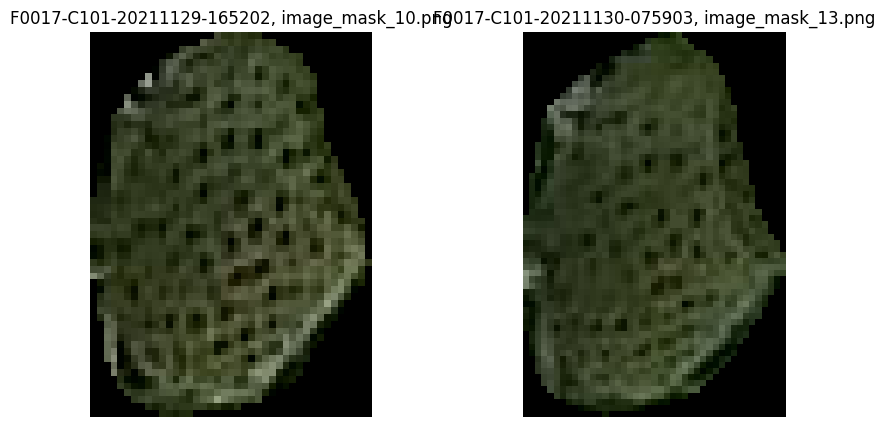

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_12
mask_id                                 8b498dcd727757f76e5fc1540f6eed07
point_x_x                                                     141.727173
point_y_x                                                     360.534882
output_image_path_x                                    image_mask_12.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

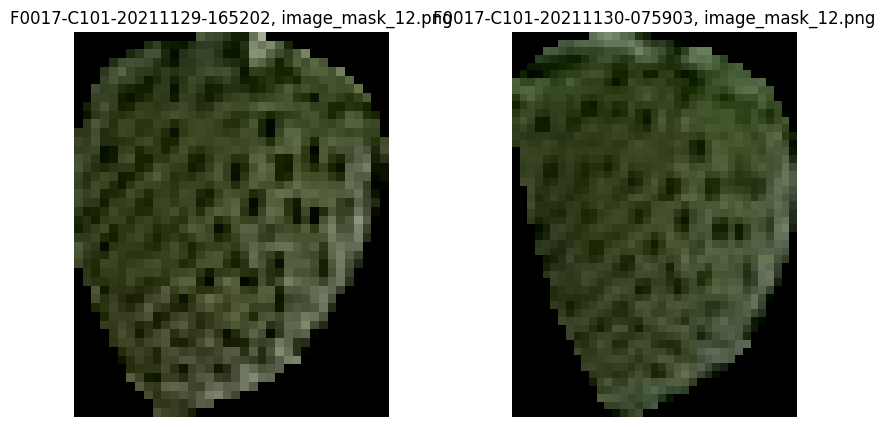

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_20
mask_id                                 a6c15fa5051469126779874ea8beb59d
point_x_x                                                     883.568298
point_y_x                                                     367.507019
output_image_path_x                                    image_mask_20.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

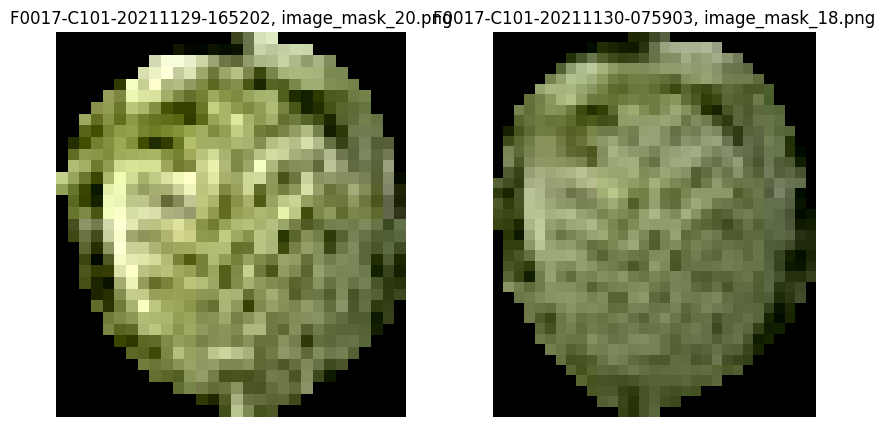

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_22
mask_id                                 a6c15fa5051469126779874ea8beb59d
point_x_x                                                     883.136597
point_y_x                                                     369.584473
output_image_path_x                                    image_mask_22.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

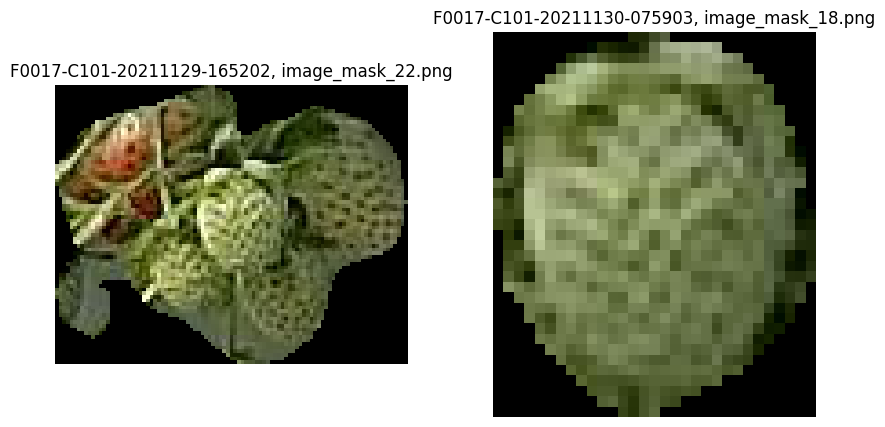

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_16
mask_id                                 c8712aaefbfac85343f53cdd7cfbdd58
point_x_x                                                      72.276695
point_y_x                                                     483.659882
output_image_path_x                                    image_mask_16.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

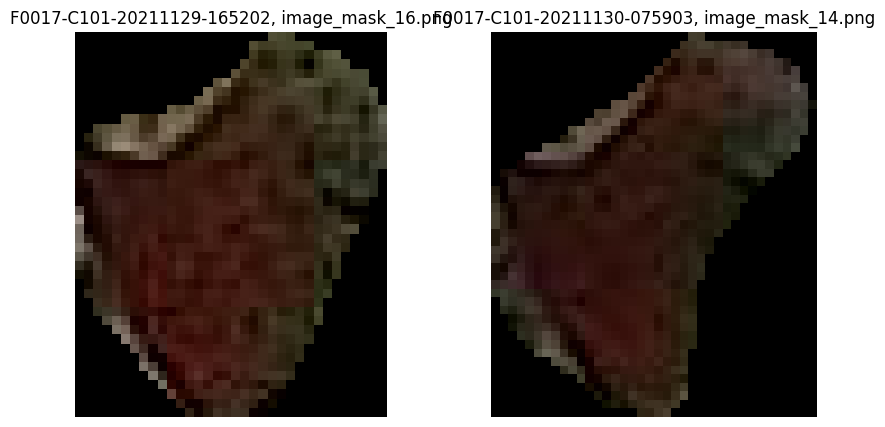

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_19
mask_id                                 cfaf6a90214892915bd56fd49e019958
point_x_x                                                      913.80127
point_y_x                                                     359.594238
output_image_path_x                                    image_mask_19.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

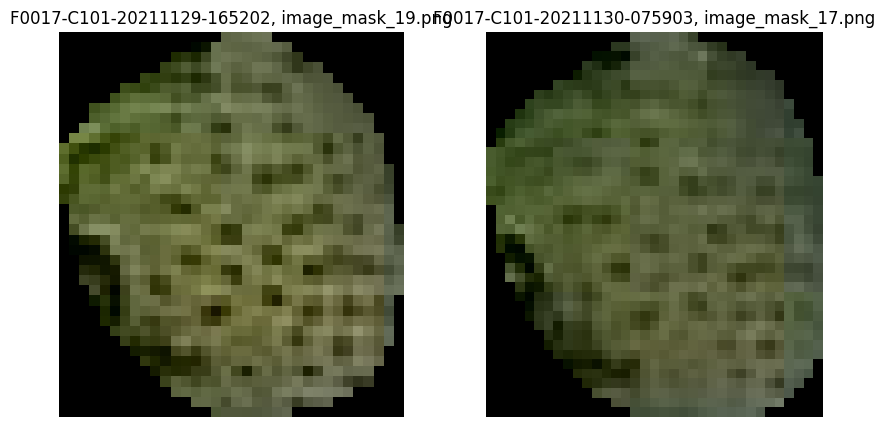

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_1
mask_id                                 e7184463cda2635a26a114bb3da73e31
point_x_x                                                     123.936569
point_y_x                                                     193.989288
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

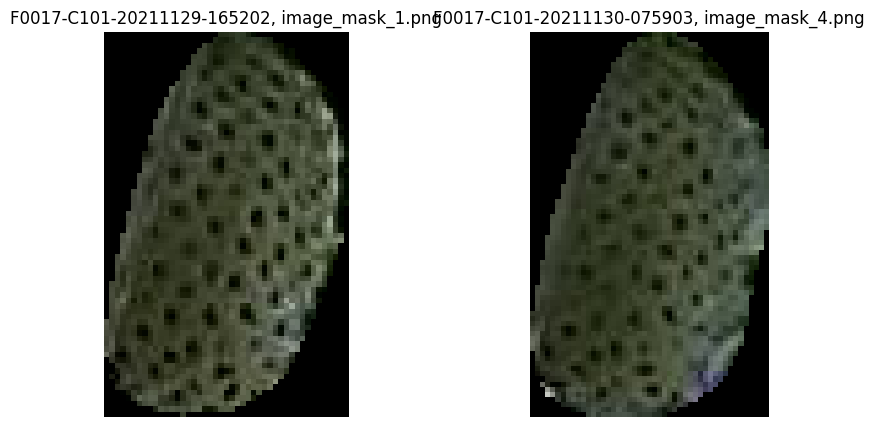

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_3
mask_id                                 ec7280ca61a3ceb64b1edb32745ef205
point_x_x                                                     334.034668
point_y_x                                                     599.616028
output_image_path_x                                     image_mask_3.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

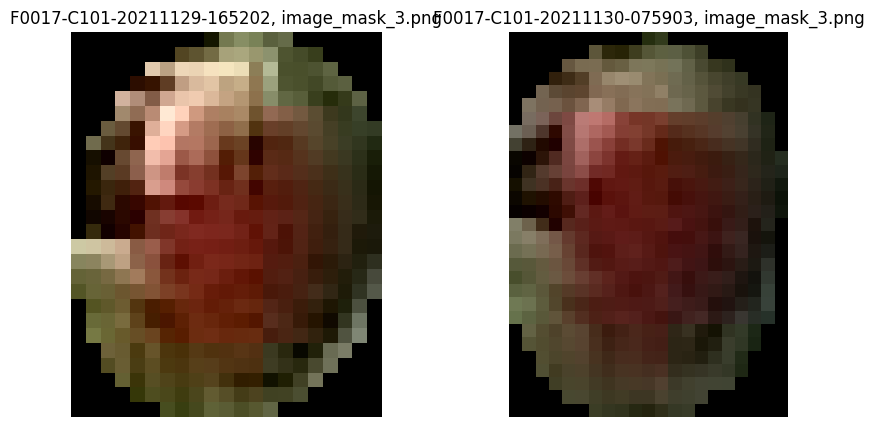

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_24
mask_id                                 f002607a17ddf8ee412e679eb463d83a
point_x_x                                                    1375.653076
point_y_x                                                     190.242737
output_image_path_x                                    image_mask_24.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

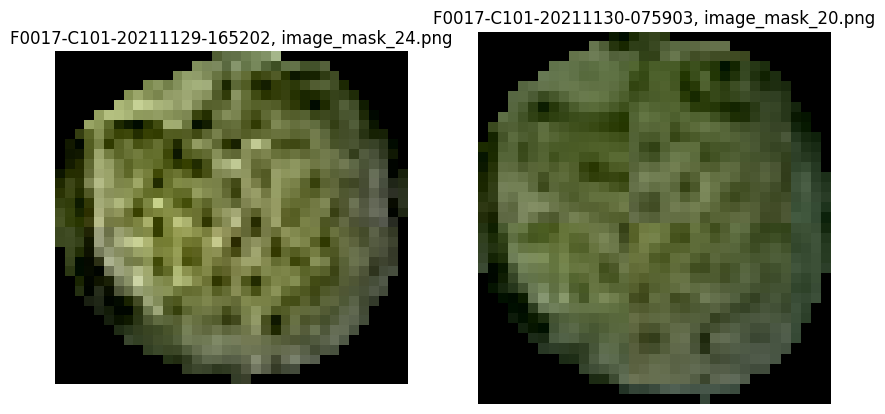

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_2
mask_id                                 f6d64b72679a00c53a5165a428677973
point_x_x                                                     224.296082
point_y_x                                                      96.445534
output_image_path_x                                     image_mask_2.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

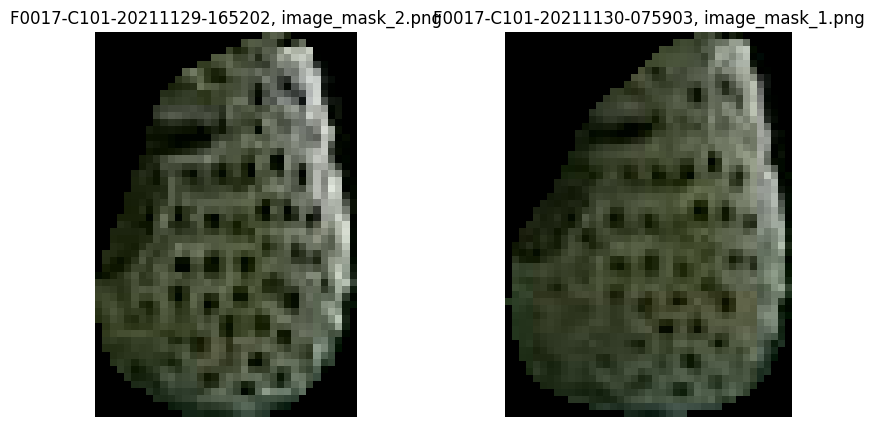

In [83]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
nov1 = nov_2021[nov_2021["before_img_name"] == "F0017-C101-20211129-125903"]
nov2 = nov_2021[nov_2021["before_img_name"] == "F0017-C101-20211129-165202"]

nov0506 = pd.merge(nov1, nov2, on="mask_id", how="outer")
nov0506.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)

In [84]:
### 2021년 12월에 해당하는 이미지 필터링
dec_2021 = f0017[(f0017["측정년도"] == 2021) & (f0017["측정월"] == 12)]

# 측정 일자를 datetime으로 변환
dec_2021["측정일자"] = pd.to_datetime(dec_2021["측정일자"])

# 날짜 필터링
dec_2021 = dec_2021[(dec_2021["측정일자"].dt.weekday == 0) | (dec_2021["측정일자"].dt.weekday == 1)]

dec_2021['before_img_name'].unique()

/tmp/ipykernel_263817/476663427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_2021["측정일자"] = pd.to_datetime(dec_2021["측정일자"])


array(['F0017-C101-20211205-165202', 'F0017-C101-20211206-075903',
       'F0017-C101-20211206-125903', 'F0017-C101-20211206-165202',
       'F0017-C101-20211207-075902', 'F0017-C101-20211207-110200',
       'F0017-C101-20211212-163400', 'F0017-C101-20211213-084500',
       'F0017-C101-20211213-123100', 'F0017-C101-20211213-165202',
       'F0017-C101-20211214-083000', 'F0017-C101-20211214-123100',
       'F0017-C101-20211219-163000', 'F0017-C101-20211220-084600',
       'F0017-C101-20211220-123600', 'F0017-C101-20211220-164700',
       'F0017-C101-20211221-083000', 'F0017-C101-20211221-124600',
       'F0017-C101-20211226-163000', 'F0017-C101-20211227-083000',
       'F0017-C101-20211227-123000', 'F0017-C101-20211227-163000',
       'F0017-C101-20211228-084500', 'F0017-C101-20211228-124500'],
      dtype=object)

In [85]:
### 전후 딸기 매핑이 잘 되었는지 확인하기 위한 데이터 추출
dec1 = dec_2021[dec_2021["before_img_name"] == "F0017-C101-20211205-165202"]
dec2 = dec_2021[dec_2021["before_img_name"] == "F0017-C101-20211206-075903"]

dec0102 = pd.merge(nov1, nov2, on="mask_id", how="outer")
dec0102.drop(['check_datetime_x', '측정일자_x', '내부온도_x',
       '내부습도_x', '내부CO2_x', '근권온도_x', '내부순간일사량_x', '측정년도_x', '측정월_x',
       'img_id_x', "구역명_x", 
       'shot_datetime_x', 'count_masks_x', 'bbox_image_path_x',
       'before_img_id_x', 'size_x', 'color_x',
       'check_datetime_y', '측정일자_y', '내부온도_y',
       '내부습도_y', '내부CO2_y', '근권온도_y', '내부순간일사량_y', '측정년도_y', '측정월_y',
       'img_id_y', "구역명_y", 
       'shot_datetime_y', 'count_masks_y', 'bbox_image_path_y',
       'size_y', 'color_y',], axis=1, inplace=True)

dec0102.head(5)

,farm_code_x,input_image_name_x,input_image_path_x,area_code_x,before_img_name_x,mask_num_x,mask_id,point_x_x,point_y_x,output_image_path_x,farm_code_y,input_image_name_y,input_image_path_y,area_code_y,before_img_name_y,before_img_id_y,mask_num_y,point_x_y,point_y_y,output_image_path_y
0,F0017,F0017-C101-20211129-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-125903,F0017-C101-20211129-165202_21,02ea6f0da3b4b8273723303ec920d764,897.537964,390.411804,image_mask_21.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,03202f9eaea782c365c8d6f993394dc5,NaN,NaN,NaN,F0017,F0017-C101-20211130-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-165202,70519b108325db0c5cfc9bc44aa86a9b,F0017-C101-20211130-075903_22,1358.058594,175.060394,image_mask_22.png
2,F0017,F0017-C101-20211129-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-125903,F0017-C101-20211129-165202_7,098f6ae056e37b6a678b7909d210569b,189.692245,289.297119,image_mask_7.png,F0017,F0017-C101-20211130-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-165202,70519b108325db0c5cfc9bc44aa86a9b,F0017-C101-20211130-075903_8,190.173416,297.513977,image_mask_8.png
3,F0017,F0017-C101-20211129-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-125903,F0017-C101-20211129-165202_4,0ec7654288b21bbf951c10c7f1cbe638,62.504658,455.395935,image_mask_4.png,F0017,F0017-C101-20211130-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-165202,70519b108325db0c5cfc9bc44aa86a9b,F0017-C101-20211130-075903_6,61.764053,455.786987,image_mask_6.png
4,F0017,F0017-C101-20211129-165202,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-125903,F0017-C101-20211129-165202_6,167250cd99e21b86a381686cab560708,157.214737,282.213959,image_mask_6.png,F0017,F0017-C101-20211130-075903,/home/ubuntu/drive/dataset/plant/F0017/C101/F0...,C101,F0017-C101-20211129-165202,70519b108325db0c5cfc9bc44aa86a9b,F0017-C101-20211130-075903_10,156.529373,286.014343,image_mask_10.png


farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_7
mask_id                                 098f6ae056e37b6a678b7909d210569b
point_x_x                                                     189.692245
point_y_x                                                     289.297119
output_image_path_x                                     image_mask_7.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

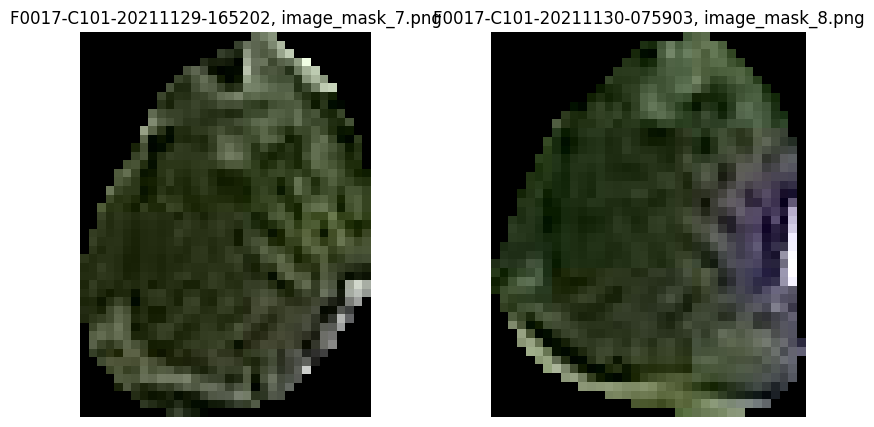

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_4
mask_id                                 0ec7654288b21bbf951c10c7f1cbe638
point_x_x                                                      62.504658
point_y_x                                                     455.395935
output_image_path_x                                     image_mask_4.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

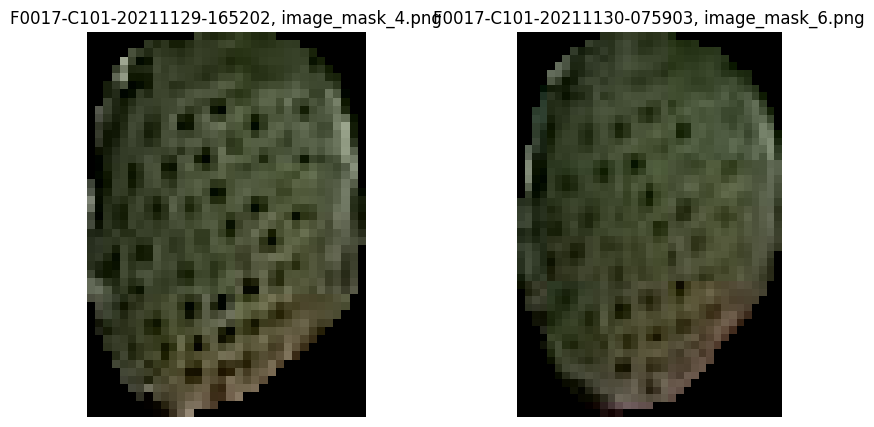

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_6
mask_id                                 167250cd99e21b86a381686cab560708
point_x_x                                                     157.214737
point_y_x                                                     282.213959
output_image_path_x                                     image_mask_6.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

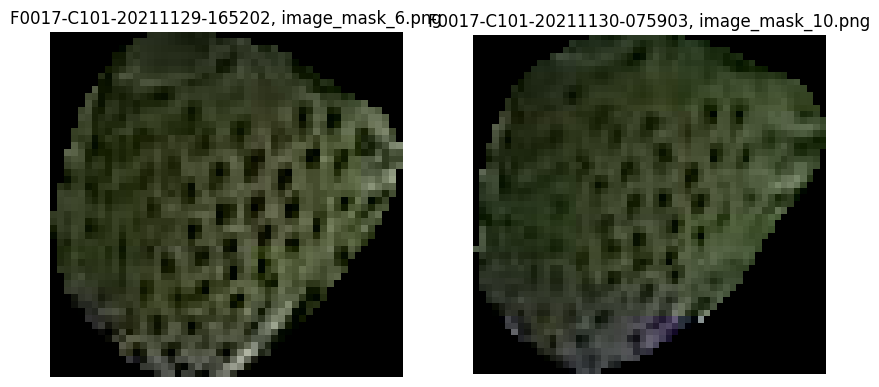

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_14
mask_id                                 3432cc1f57ed7e80d4e0e855215ea50b
point_x_x                                                     262.958679
point_y_x                                                       5.449702
output_image_path_x                                    image_mask_14.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

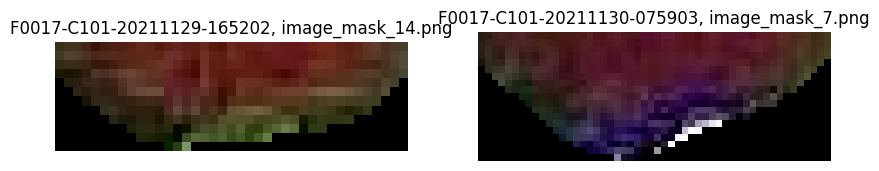

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_8
mask_id                                 3460fbd818154bba28c1597704b4dffe
point_x_x                                                     462.768433
point_y_x                                                     543.457153
output_image_path_x                                     image_mask_8.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

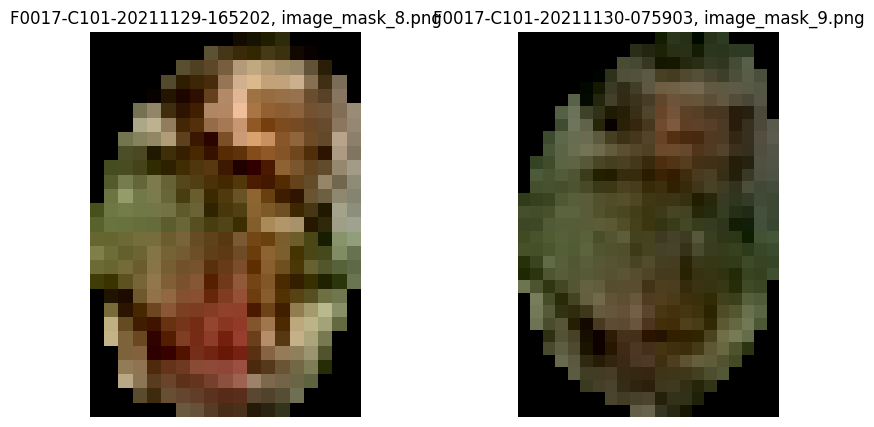

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_18
mask_id                                 36de618f65b5ed4461c6d304d55a906a
point_x_x                                                     975.778809
point_y_x                                                      533.97229
output_image_path_x                                    image_mask_18.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

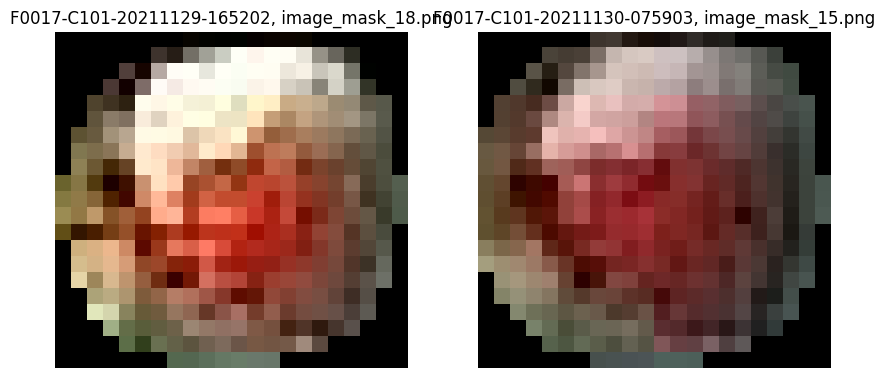

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_5
mask_id                                 446807a9d97275b6adf802ed15368377
point_x_x                                                     100.115189
point_y_x                                                     289.758911
output_image_path_x                                     image_mask_5.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

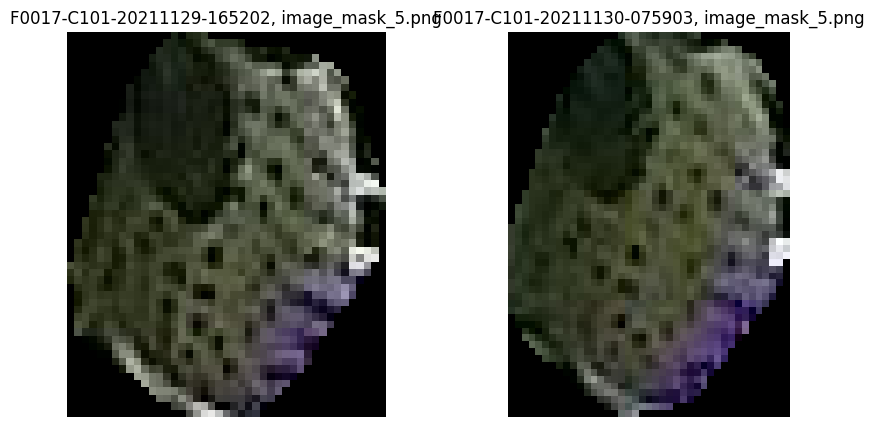

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_23
mask_id                                 714e4cd6b0753e7aacce077ea60083c8
point_x_x                                                    1421.647949
point_y_x                                                     154.472015
output_image_path_x                                    image_mask_23.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

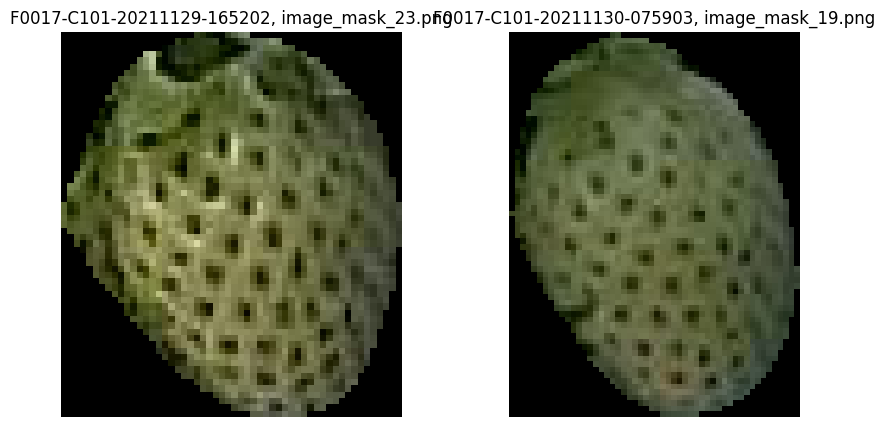

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_11
mask_id                                 75203848e9041acb23fae370d2c3368f
point_x_x                                                     217.180756
point_y_x                                                      53.757778
output_image_path_x                                    image_mask_11.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

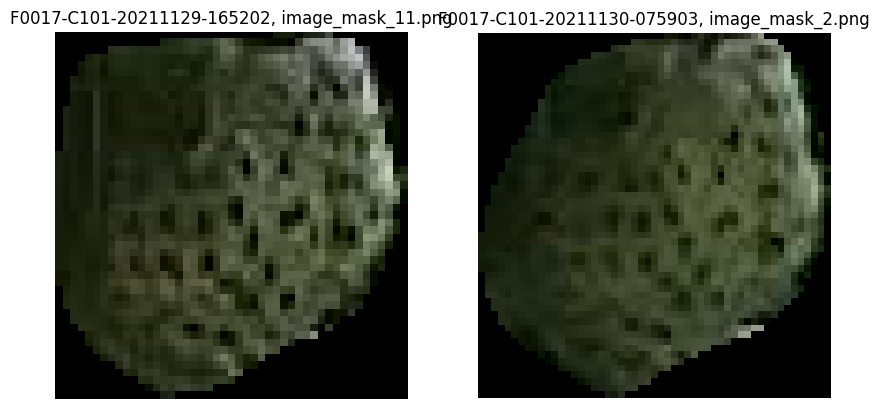

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_15
mask_id                                 75203848e9041acb23fae370d2c3368f
point_x_x                                                     224.512421
point_y_x                                                      56.424355
output_image_path_x                                    image_mask_15.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

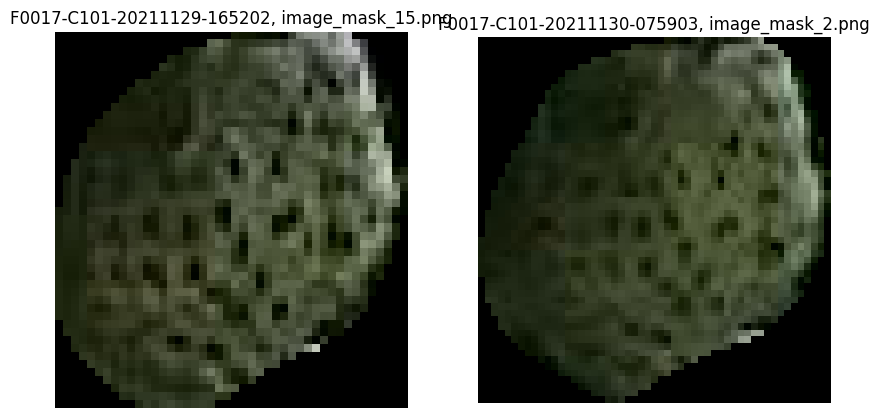

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_9
mask_id                                 871f90ea47387dd6a88f1b4608543556
point_x_x                                                      91.688217
point_y_x                                                     500.002197
output_image_path_x                                     image_mask_9.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

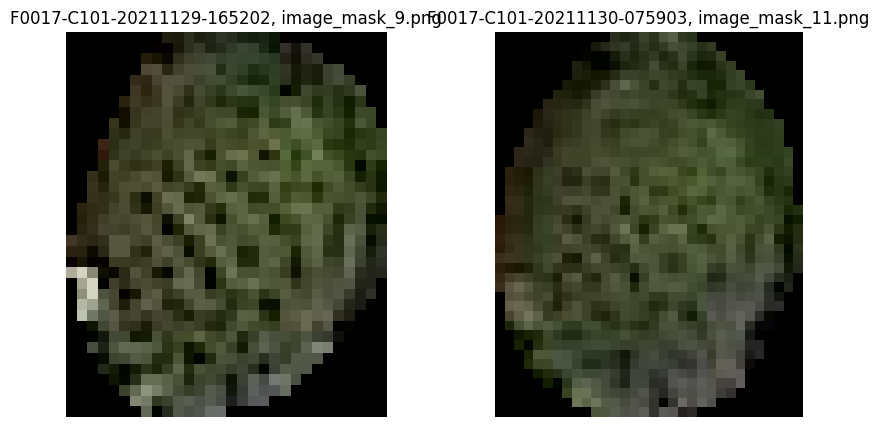

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_10
mask_id                                 896b306c80f36f641ddf25a547d8e159
point_x_x                                                     113.216599
point_y_x                                                     381.096527
output_image_path_x                                    image_mask_10.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

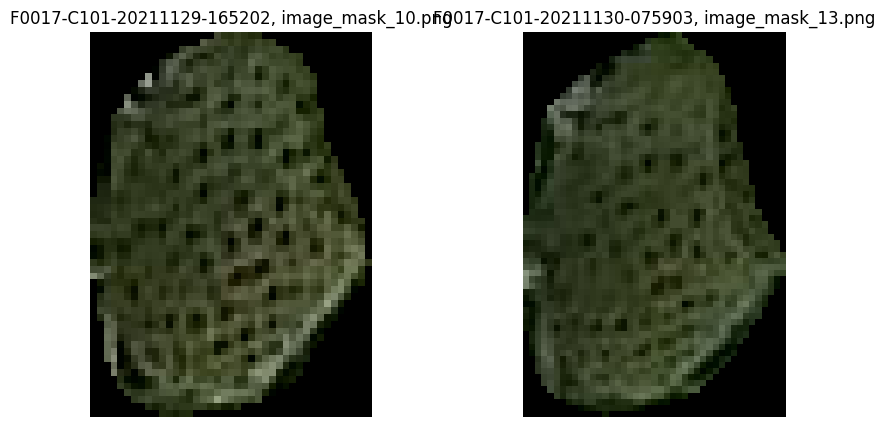

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_12
mask_id                                 8b498dcd727757f76e5fc1540f6eed07
point_x_x                                                     141.727173
point_y_x                                                     360.534882
output_image_path_x                                    image_mask_12.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

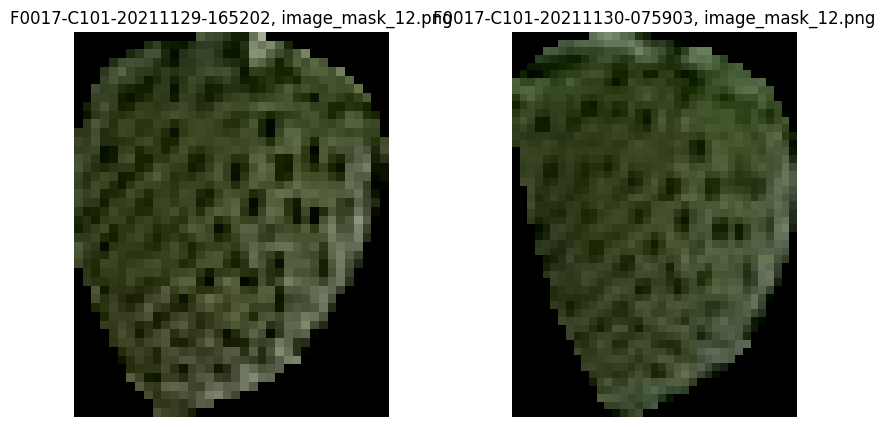

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_20
mask_id                                 a6c15fa5051469126779874ea8beb59d
point_x_x                                                     883.568298
point_y_x                                                     367.507019
output_image_path_x                                    image_mask_20.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

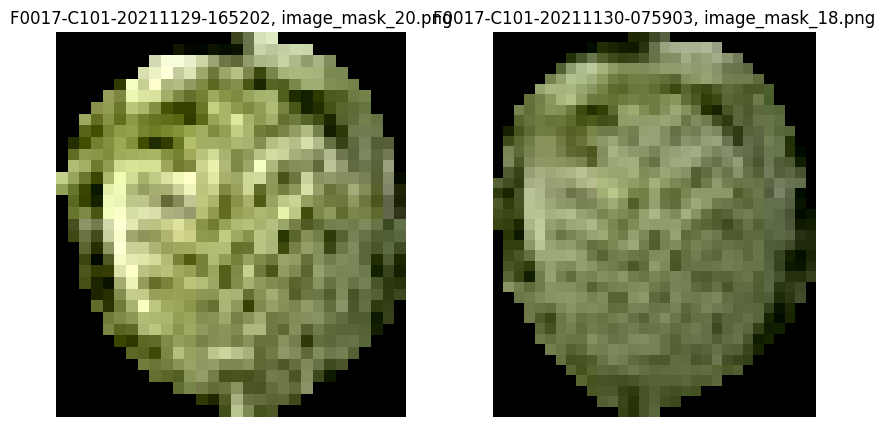

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_22
mask_id                                 a6c15fa5051469126779874ea8beb59d
point_x_x                                                     883.136597
point_y_x                                                     369.584473
output_image_path_x                                    image_mask_22.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

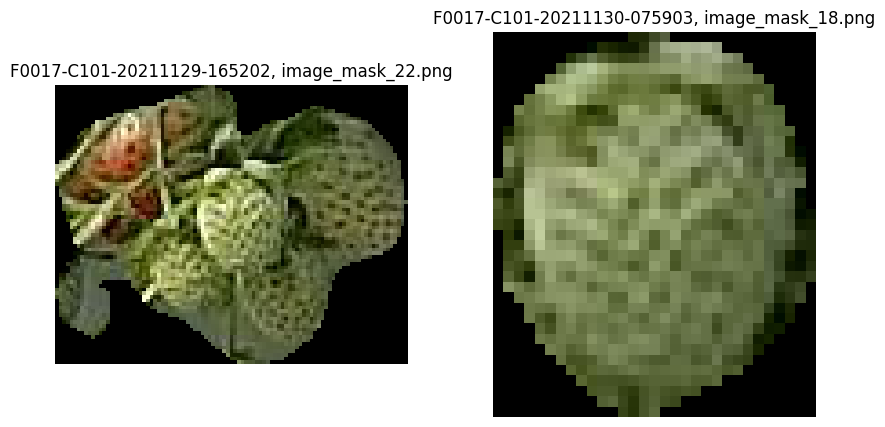

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_16
mask_id                                 c8712aaefbfac85343f53cdd7cfbdd58
point_x_x                                                      72.276695
point_y_x                                                     483.659882
output_image_path_x                                    image_mask_16.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

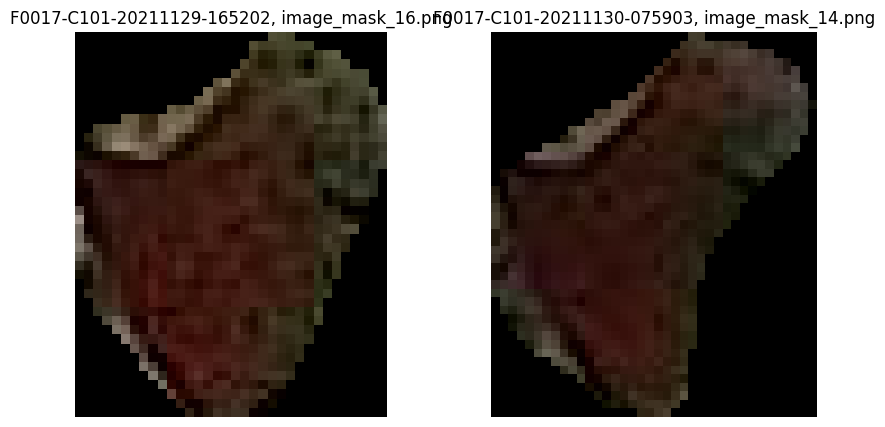

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_19
mask_id                                 cfaf6a90214892915bd56fd49e019958
point_x_x                                                      913.80127
point_y_x                                                     359.594238
output_image_path_x                                    image_mask_19.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

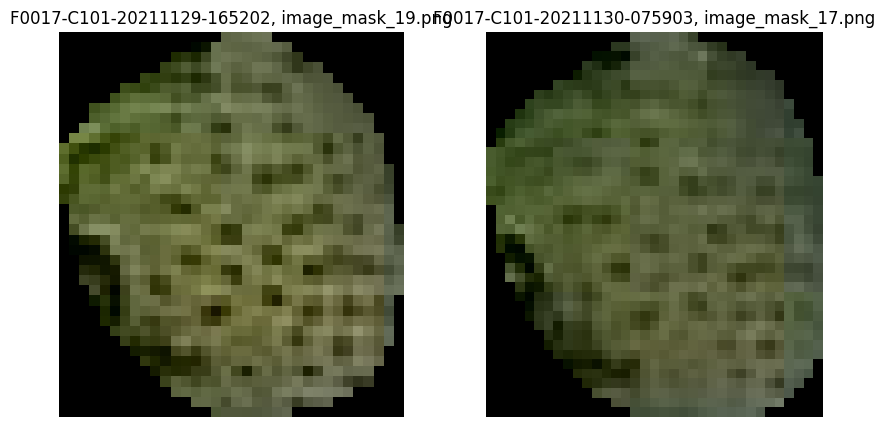

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_1
mask_id                                 e7184463cda2635a26a114bb3da73e31
point_x_x                                                     123.936569
point_y_x                                                     193.989288
output_image_path_x                                     image_mask_1.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

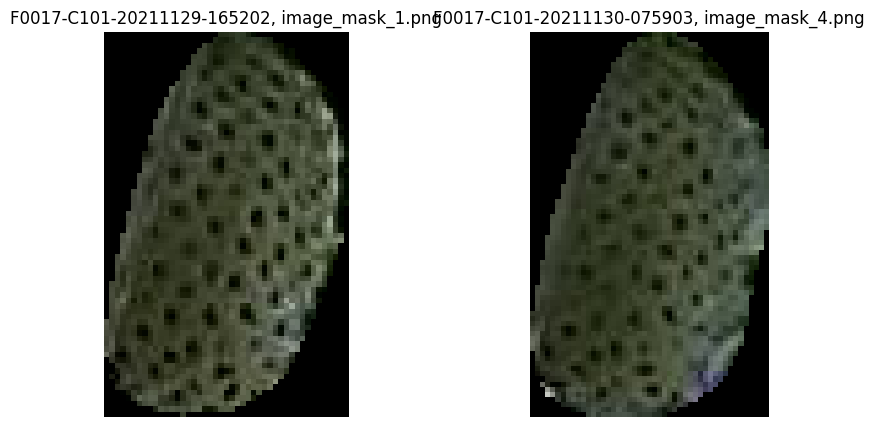

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_3
mask_id                                 ec7280ca61a3ceb64b1edb32745ef205
point_x_x                                                     334.034668
point_y_x                                                     599.616028
output_image_path_x                                     image_mask_3.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

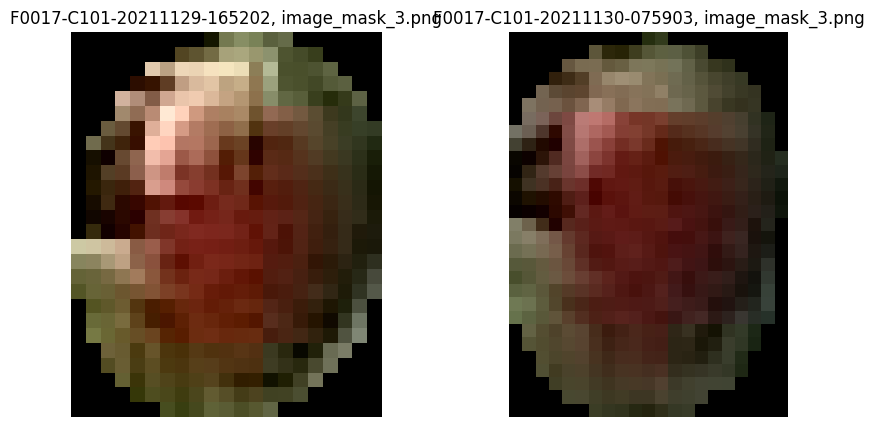

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                 F0017-C101-20211129-165202_24
mask_id                                 f002607a17ddf8ee412e679eb463d83a
point_x_x                                                    1375.653076
point_y_x                                                     190.242737
output_image_path_x                                    image_mask_24.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

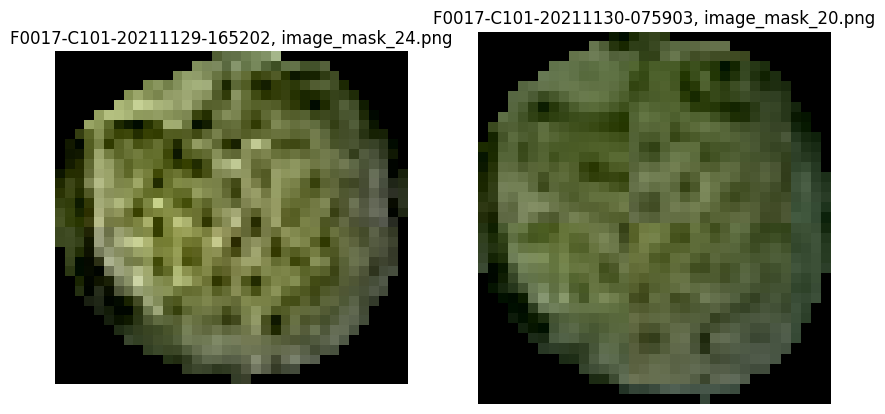

farm_code_x                                                        F0017
input_image_name_x                            F0017-C101-20211129-165202
input_image_path_x     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_x                                                         C101
before_img_name_x                             F0017-C101-20211129-125903
mask_num_x                                  F0017-C101-20211129-165202_2
mask_id                                 f6d64b72679a00c53a5165a428677973
point_x_x                                                     224.296082
point_y_x                                                      96.445534
output_image_path_x                                     image_mask_2.png
farm_code_y                                                        F0017
input_image_name_y                            F0017-C101-20211130-075903
input_image_path_y     /home/ubuntu/drive/dataset/plant/F0017/C101/F0...
area_code_y                                        

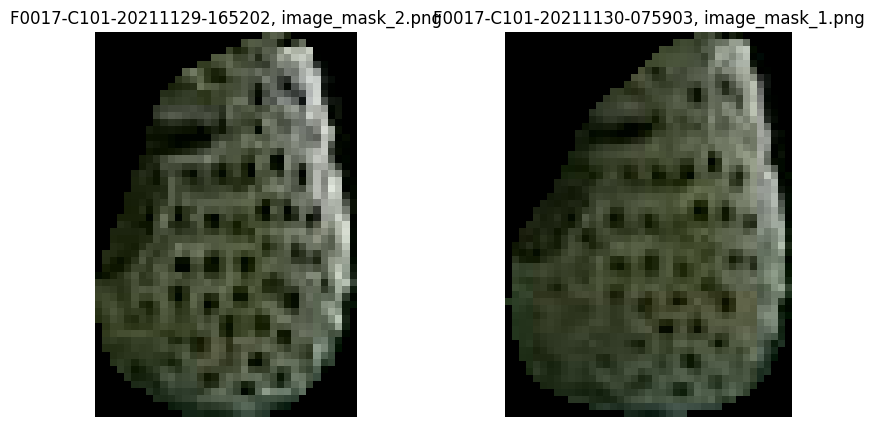

In [86]:
def visualize_mask(df_row, base_folder):
    input_img_name_x = df_row['input_image_name_x']  # 이미지 파일명 가져오기
    input_img_name_y = df_row["input_image_name_y"]

    farm_code_x = df_row["farm_code_x"]
    farm_code_y = df_row["farm_code_y"]
    
    area_code_x = df_row["area_code_x"]
    area_code_y = df_row["area_code_y"]
    
    
    mask_id_x = df_row['output_image_path_x']  # Mask ID 가져오기
    mask_id_y = df_row["output_image_path_y"]
    
    base_folder_x = base_folder + farm_code_x + "/" + area_code_x + "/" + input_img_name_x + "/masks/"
    base_folder_y = base_folder + farm_code_y + "/" + area_code_y + "/" + input_img_name_y + "/masks/"

    # 이미지 파일 경로 생성
    mask_path_x = os.path.join(base_folder_x, mask_id_x)
    mask_path_y = os.path.join(base_folder_y, mask_id_y)

    # 이미지 및 마스크 불러오기
    mask_x = cv2.imread(mask_path_x)
    mask_y = cv2.imread(mask_path_y)

    # 이미지 및 마스크 시각화
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(mask_x, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_x}, {mask_id_x}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(mask_y, cv2.COLOR_BGR2RGB))
    plt.title(f'{input_img_name_y}, {mask_id_y}')
    plt.axis('off')

    plt.show()

# 이미지가 저장된 폴더 경로 설정
base_folder = "/home/ubuntu/drive/dataset/SAM_result/"

# 각 행에 대해 visualize_mask 함수 호출
for index, row in nov0506.iterrows():
    if (row["input_image_name_x"] is not np.nan) & (row["input_image_name_y"] is not np.nan):
        print(row)
        print("-"*30)   
        visualize_mask(row, base_folder)